**Description:** We want to use different ML (supervised and unsupervised) approaches to predict churns of subscriptions of the german newspaper “Die Zeit”. Supervised ML methods can be used to predict (classification methods) subscription churns based on the given dataset. Since a large number of features exists, feature selection as part of an extensive EDA is essential. Unsupervised ML methods could be used first to do clustering on the dataset to identify if there are certain “groups of subscribers”, who share certain features. This clustering could be used to investigate subscriber group specific churn mitigation methods (not only writing emails, as given in the dataset description).

**Project Name:** Churn Predition - Die Zeit

**Team:** Carlotta Ulm, Silas Mederer, Jonas Bechthold

**Date:** 2020-10-26 to 2020-11-27

# Setting up environment and imports

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import math
import itertools
from time import time

# own modules
import eda_methods as eda

# visualization
import seaborn as sns
sns.set(style="white")  
#sns.set_theme()

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
from pandas.plotting import scatter_matrix

# pandas profiling
from pandas_profiling import ProfileReport

# warnings handler
import warnings
warnings.filterwarnings("ignore")

random_state = 100           # Ensures modeling results can be replicated
np.random.seed(42)

# Display Options for pandas
pd.set_option('display.max_columns', None) # Sets maximum columns displayed in tables
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

# Variables for plot sizes
matplotlib.rc('font', size=20)          # controls default text sizes
matplotlib.rc('axes', titlesize=16)     # fontsize of the axes title
matplotlib.rc('axes', labelsize=18)    # fontsize of the x and y labels
matplotlib.rc('xtick', labelsize=18)    # fontsize of the tick labels
matplotlib.rc('ytick', labelsize=18)    # fontsize of the tick labels
matplotlib.rc('legend', fontsize=14)    # legend fontsize
matplotlib.rc('figure', titlesize=20)

####################################################
# Machine Learning Libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import fbeta_score, accuracy_score, f1_score, recall_score, precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer 
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#Pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#geodaten
import geopandas as gpd
from descartes.patch import PolygonPatch

# Business Understanding 

Please check the [wiki page: Business understanding (publishing and news)](https://github.com/jb-ds2020/nf-ds3-capstone-churn-prevention/wiki/Business-understanding-(publishing-and-news)).

## General

## Background


## Key Questions

## Dataset Description

Let's get an idea about the columns and find out what they mean:

In [2]:
df = pd.read_csv('data/f_chtr_churn_traintable_nf.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161760 entries, 0 to 161759
Columns: 170 entries, Unnamed: 0 to date_x
dtypes: float64(31), int64(121), object(18)
memory usage: 209.8+ MB


In [3]:
df.head()

Unnamed: 0                        auftrag_new_id liefer_beginn_evt  \
0  0           8F55996E-22DD-4450-808F-9F2410C65F0C  2018-08-29         
1  1           FDC16301-8457-4FCE-A630-172D027B4FA6  2018-08-29         
2  2           1B81B3D5-5D6A-4AE7-9AF2-DB5BE537CD90  2018-10-31         
3  3           CF5D1C66-D1B5-454E-B3AD-541792B56EBF  2018-08-01         
4  4           0CE98B1B-1167-4967-B68C-559AEBA1001B  2018-08-29         

              kanal   objekt_name     aboform_name zahlung_rhythmus_name  \
0  E-Mailing         ZEIT Digital  Negative Option  vierteljährlich        
1  andere            ZEIT Digital  Negative Option  halbjährlich           
2  Telefonmarketing  DIE ZEIT      Festabo          vierteljährlich        
3  andere            ZEIT Digital  Festabo          vierteljährlich        
4  andere            ZEIT Digital  Negative Option  halbjährlich           

   lesedauer  rechnungsmonat zahlung_weg_name  studentenabo plz_1 plz_2 plz_3  \
0  19         0               Bankeinzug       0             3     37    372    
1  21         0               Rechnung         0             4     45    451    
2  17         0               Bankeinzug       0             4     40    406    
3  17         0               Bankeinzug       0             8     82    825    
4  11         0               Rechnung         0             7     70    701    

              ort  metropole land_iso_code  shop_kauf  unterbrechung anrede  \
0  Neu-Eichenberg  0          DE            0          0              Herr    
1  Essen           1          DE            0          0              Herr    
2  Düsseldorf      1          DE            2          1              Frau    
3  Münsing         0          DE            0          0              Frau    
4  Stuttgart       1          DE            0          0              Frau    

        titel  avg_churn  zon_che_opt_in  zon_sit_opt_in  zon_zp_grey  \
0  kein Titel  0.412416   0               0               0             
1  kein Titel  0.373177   0               0               0             
2  kein Titel  0.472616   0               0               1             
3  kein Titel  0.472616   0               0               0             
4  kein Titel  0.534802   0               0               0             

   zon_premium  zon_boa  zon_kommentar  zon_sonstige  zon_zp_red  zon_rawr  \
0  1            0        0              0             0           0          
1  0            0        0              0             1           0          
2  0            0        0              0             0           0          
3  1            0        0              0             0           0          
4  1            0        0              0             0           0          

   zon_community  zon_app_sonstige  zon_schach  zon_blog_kommentare  zon_quiz  \
0  0              0                 0           0                    0          
1  0              0                 0           0                    0          
2  0              0                 0           0                    0          
3  0              0                 0           0                    0          
4  0              0                 0           0                    0          

   cnt_abo  cnt_abo_diezeit  cnt_abo_diezeit_digital  cnt_abo_magazin  \
0  2        2                0                        0                 
1  0        0                0                        0                 
2  1        1                0                        0                 
3  7        3                1                        3                 
4  0        0                0                        0                 

   cnt_umwandlungsstatus2_dkey abo_registrierung_min  nl_zeitbrief  \
0  2                            2015-03-12 12:33:54   0              
1  0                            2018-07-30 03:32:59   2              
2  1                            1986-07-01 12:00:00   0              
3  3                           

In [4]:
df.tail(1)

Unnamed: 0                        auftrag_new_id liefer_beginn_evt  \
161759  161759      8614DABF-1304-4B7A-98CB-33A42F19774E  2018-09-06         

                   kanal objekt_name aboform_name zahlung_rhythmus_name  \
161759  Telefonmarketing  DIE ZEIT    Festabo      vierteljährlich        

        lesedauer  rechnungsmonat zahlung_weg_name  studentenabo plz_1 plz_2  \
161759  12         0               Rechnung         0             6     60     

       plz_3        ort  metropole land_iso_code  shop_kauf  unterbrechung  \
161759  603   Frankfurt  0          DE            0          1               

       anrede       titel  avg_churn  zon_che_opt_in  zon_sit_opt_in  \
161759  Frau   kein Titel  0.565934   0               0                

        zon_zp_grey  zon_premium  zon_boa  zon_kommentar  zon_sonstige  \
161759  2            0            0        0              0              

        zon_zp_red  zon_rawr  zon_community  zon_app_sonstige  zon_schach  \
161759  0           0         0              0                 0            

        zon_blog_kommentare  zon_quiz  cnt_abo  cnt_abo_diezeit  \
161759  0                    0         5        5                 

        cnt_abo_diezeit_digital  cnt_abo_magazin  cnt_umwandlungsstatus2_dkey  \
161759  0                        0                1                             

       abo_registrierung_min  nl_zeitbrief  nl_zeitshop  \
161759  2014-05-19 16:53:35   1             0             

        nl_zeitverlag_hamburg  nl_fdz_organisch  nl_blacklist_sum  \
161759  0                      0                 0                  

        nl_bounced_sum  nl_aktivitaet nl_registrierung_min  nl_sperrliste_sum  \
161759  0               7              2011-03-29 12:42:54  0                   

        nl_opt_in_sum  boa_reg  che_reg  sit_reg  sso_reg  received_anzahl_1w  \
161759  1              0        0        0        1        0                    

        received_anzahl_1m  received_anzahl_3m  received_anzahl_6m  \
161759  0                   0                   0                    

        opened_anzahl_1w  opened_anzahl_1m  opened_anzahl_3m  openedanzahl_6m  \
161759  0                 0                 0                 0                 

        clicked_anzahl_1w  clicked_anzahl_1m  clicked_anzahl_3m  \
161759  0                  0                  0                   

        clicked_anzahl_6m  unsubscribed_anzahl_1w  unsubscribed_anzahl_1m  \
161759  0                  0                       0                        

        unsubscribed_anzahl_3m  unsubscribed_anzahl_6m  openrate_1w  \
161759  0                       0                       0.0           

        clickrate_1w  openrate_1m  clickrate_1m  openrate_3m  clickrate_3m  \
161759  0.0           0.0          0.0           0.0          0.0            

        received_anzahl_bestandskunden_1w  received_anzahl_bestandskunden_1m  \
161759  0                                  0                                   

        received_anzahl_bestandskunden_3m  received_anzahl_bestandskunden_6m  \
161759  0                                  0                                   

        opened_anzahl_bestandskunden_1w  opened_anzahl_bestandskunden_1m  \
161759  0                                0                                 

        opened_anzahl_bestandskunden_3m  openedanzahl_bestandskunden_6m  \
161759  0                                0                                

        clicked_anzahl_bestandskunden_1w  clicked_anzahl_bestandskunden_1m  \
161759  0                                 0                                  

        clicked_anzahl_bestandskunden_3m  clicked_anzahl_bestandskunden_6m  \
161759  0                                 0                                  

        unsubscribed_anzahl_bestandskunden_1w  \
161759  0                                       

        unsubscribed_anzahl_bestandskunden_1m  \
161759  0                                       

        unsubscribe

In [5]:
df.drop("Unnamed: 0", axis=1, inplace=True)

In [6]:
columnlist = list(df.columns) 
columnlist

['auftrag_new_id',
 'liefer_beginn_evt',
 'kanal',
 'objekt_name',
 'aboform_name',
 'zahlung_rhythmus_name',
 'lesedauer',
 'rechnungsmonat',
 'zahlung_weg_name',
 'studentenabo',
 'plz_1',
 'plz_2',
 'plz_3',
 'ort',
 'metropole',
 'land_iso_code',
 'shop_kauf',
 'unterbrechung',
 'anrede',
 'titel',
 'avg_churn',
 'zon_che_opt_in',
 'zon_sit_opt_in',
 'zon_zp_grey',
 'zon_premium',
 'zon_boa',
 'zon_kommentar',
 'zon_sonstige',
 'zon_zp_red',
 'zon_rawr',
 'zon_community',
 'zon_app_sonstige',
 'zon_schach',
 'zon_blog_kommentare',
 'zon_quiz',
 'cnt_abo',
 'cnt_abo_diezeit',
 'cnt_abo_diezeit_digital',
 'cnt_abo_magazin',
 'cnt_umwandlungsstatus2_dkey',
 'abo_registrierung_min',
 'nl_zeitbrief',
 'nl_zeitshop',
 'nl_zeitverlag_hamburg',
 'nl_fdz_organisch',
 'nl_blacklist_sum',
 'nl_bounced_sum',
 'nl_aktivitaet',
 'nl_registrierung_min',
 'nl_sperrliste_sum',
 'nl_opt_in_sum',
 'boa_reg',
 'che_reg',
 'sit_reg',
 'sso_reg',
 'received_anzahl_1w',
 'received_anzahl_1m',
 'received_

In [7]:
eda.describe_plus(df).round(2)

count   mean     std  min    25%  \
lesedauer                              161760.0  31.50  21.43   0.0  13.00   
rechnungsmonat                         161760.0  0.10   0.30    0.0  0.00    
studentenabo                           161760.0  0.11   0.31    0.0  0.00    
metropole                              161760.0  0.29   0.45    0.0  0.00    
shop_kauf                              161760.0  0.46   2.21    0.0  0.00    
unterbrechung                          161760.0  0.10   0.30    0.0  0.00    
avg_churn                              161760.0  0.32   0.15    0.1  0.19    
zon_che_opt_in                         161760.0  0.00   0.05    0.0  0.00    
zon_sit_opt_in                         161760.0  0.00   0.03    0.0  0.00    
zon_zp_grey                            161760.0  0.16   0.46    0.0  0.00    
zon_premium                            161760.0  0.16   0.46    0.0  0.00    
zon_boa                                161760.0  0.01   0.10    0.0  0.00    
zon_kommentar                          161760.0  0.00   0.07    0.0  0.00    
zon_sonstige                           161760.0  0.05   0.26    0.0  0.00    
zon_zp_red                             161760.0  0.04   0.25    0.0  0.00    
zon_rawr                               161760.0  0.00   0.02    0.0  0.00    
zon_community                          161760.0  0.00   0.01    0.0  0.00    
zon_app_sonstige                       161760.0  0.00   0.06    0.0  0.00    
zon_schach                             161760.0  0.00   0.02    0.0  0.00    
zon_blog_kommentare                    161760.0  0.00   0.03    0.0  0.00    
zon_quiz                               161760.0  0.00   0.02    0.0  0.00    
cnt_abo                                161760.0  7.11   166.69  0.0  0.00    
cnt_abo_diezeit                        161760.0  4.63   96.44   0.0  0.00    
cnt_abo_diezeit_digital                161760.0  0.50   11.09   0.0  0.00    
cnt_abo_magazin                        161760.0  0.59   10.63   0.0  0.00    
cnt_umwandlungsstatus2_dkey            161760.0  2.76   71.74   0.0  0.00    
nl_zeitbrief                           161760.0  1.37   0.88    0.0  0.00    
nl_zeitshop                            161760.0  0.29   0.67    0.0  0.00    
nl_zeitverlag_hamburg                  161760.0  0.12   0.45    0.0  0.00    
nl_fdz_organisch                       161760.0  0.00   0.02    0.0  0.00    
nl_blacklist_sum                       161760.0  0.05   0.44    0.0  0.00    
nl_bounced_sum                         161760.0  0.13   0.60    0.0  0.00    
nl_aktivitaet                          161760.0  6.65   4.36    0.0  4.00    
nl_sperrliste_sum                      161760.0  0.08   1.48    0.0  0.00    
nl_opt_in_sum                          161760.0  0.27   0.62    0.0  0.00    
boa_reg                                161760.0  0.07   0.26    0.0  0.00    
che_reg                                161760.0  0.09   0.28    0.0  0.00    
sit_reg                                161760.0  0.07   0.26    0.0  0.00    
sso_reg                                161760.0  0.68   0.47    0.0  0.00    
received_anzahl_1w                     161760.0  1.86   3.70    0.0  0.00    
received_anzahl_1m                     161760.0  7.15   13.90   0.0  0.00    
received_anzahl_3m                     161760.0  20.44  38.84   0.0  0.00    
received_anzahl_6m                     161760.0  40.40  75.53   0.0  0.00    
opened_anzahl_1w                       161760.0  0.61   2.07    0.0  0.00    
opened_anzahl_1m                       161760.0  2.30   7.29    0.0  0.00    
opened_anzahl_3m                       161760.0  6.47   19.97   0.0  0.00    
openedanzahl_6m                        161760.0  12.59  38.36   0.0  0.00    
clicked_anzahl_1w                      161760.0  0.06   0.38    0.0  0.00    
clicked_anzahl_1m                      161760.0  0.23   1.20    0.0  0.00    
clicked_anzahl_3m                      161760.0  0.64   3.04    0.0  0.00    
clicked_anzahl_6m                      161760.0  1.20   5.62    

## Get an idea of the column names by sampling

In [8]:
df.sample(2)

auftrag_new_id liefer_beginn_evt   kanal  \
35384  772EC65E-50E3-49CA-98D8-2003C4DE5DF7  2018-08-16        andere   
62036  0C9FF4A4-E98C-4450-B5F4-7FC04CCA88AB  2013-02-21        andere   

        objekt_name aboform_name zahlung_rhythmus_name  lesedauer  \
35384  DIE ZEIT      Festabo      jährlich              21          
62036  ZEIT Digital  Festabo      jährlich              78          

       rechnungsmonat zahlung_weg_name  studentenabo plz_1 plz_2 plz_3  \
35384  0               Bankeinzug       1             1     10    105    
62036  0               Kreditkarte      0             7     70    701    

             ort  metropole land_iso_code  shop_kauf  unterbrechung anrede  \
35384  Berlin     1          DE            0          0              Herr    
62036  Stuttgart  1          DE            0          0              Herr    

            titel  avg_churn  zon_che_opt_in  zon_sit_opt_in  zon_zp_grey  \
35384  kein Titel  0.282302   0               0               0             
62036  kein Titel  0.114840   0               0               0             

       zon_premium  zon_boa  zon_kommentar  zon_sonstige  zon_zp_red  \
35384  0            0        0              0             0            
62036  0            0        0              0             0            

       zon_rawr  zon_community  zon_app_sonstige  zon_schach  \
35384  0         0              0                 0            
62036  0         0              0                 0            

       zon_blog_kommentare  zon_quiz  cnt_abo  cnt_abo_diezeit  \
35384  0                    0         4        2                 
62036  0                    0         6        3                 

       cnt_abo_diezeit_digital  cnt_abo_magazin  cnt_umwandlungsstatus2_dkey  \
35384  1                        1                2                             
62036  0                        1                1                             

      abo_registrierung_min  nl_zeitbrief  nl_zeitshop  nl_zeitverlag_hamburg  \
35384  2016-12-21 09:09:21   2             0            0                       
62036  2003-07-17 15:14:57   2             0            0                       

       nl_fdz_organisch  nl_blacklist_sum  nl_bounced_sum  nl_aktivitaet  \
35384  0                 0                 0               13              
62036  0                 1                 0               11              

      nl_registrierung_min  nl_sperrliste_sum  nl_opt_in_sum  boa_reg  \
35384  2016-12-20 07:38:02  0                  0              0         
62036  2008-01-26 20:04:41  0                  1              0         

       che_reg  sit_reg  sso_reg  received_anzahl_1w  received_anzahl_1m  \
35384  0        0        1        0                   0                    
62036  0        0        1        0                   0                    

       received_anzahl_3m  received_anzahl_6m  opened_anzahl_1w  \
35384  0                   0                   0                  
62036  0                   0                   0                  

       opened_anzahl_1m  opened_anzahl_3m  openedanzahl_6m  clicked_anzahl_1w  \
35384  0                 0                 0                0                   
62036  0                 0                 0                0                   

       clicked_anzahl_1m  clicked_anzahl_3m  clicked_anzahl_6m  \
35384  0                  0                  0                   
62036  0                  0                  0                   

       unsubscribed_anzahl_1w  unsubscribed_anzahl_1m  unsubscribed_anzahl_3m  \
35384  0                       0                       0                        
62036  0                       0                       0                        

       unsubscribed_anzahl_6m  openrate_1w  clickrate_1w  openrate_1m  \
35384  0                       0.0          0.0           0.0           
62036  0                       0.0          0.0           0.0           

       clickrate_1m  openrate_

## Dataset Overview with pandas profiling

In [9]:
# use pandas_profiling to create report
# save html to plots

# profile = ProfileReport(df)
# profile.to_file("plots/report.html")

In [10]:
from IPython.display import IFrame
IFrame(src='plots/pandas_profiling_report.html', width=1000, height=700)

## Target Metric


## Business Scenario

# Data Mining

# Data Cleaning
Purpose: Fix the inconsistencies within the data and handle the missing values

In [11]:
eda.meta(df).T

nulls percent    dtype    dup nuniques
varname                                                                       
kuendigungs_eingangs_datum             111691  69.05   object   True   349    
ort                                    88      0.05    object   True   11492  
auftrag_new_id                         0       0       object   False  161760 
openrate_produktnews_1w                0       0       float64  True   11     
clicked_anzahl_produktnews_1m          0       0       int64    True   6      
clicked_anzahl_produktnews_3m          0       0       int64    True   7      
clicked_anzahl_produktnews_6m          0       0       int64    True   7      
unsubscribed_anzahl_produktnews_1w     0       0       int64    True   2      
unsubscribed_anzahl_produktnews_1m     0       0       int64    True   2      
unsubscribed_anzahl_produktnews_3m     0       0       int64    True   2      
unsubscribed_anzahl_produktnews_6m     0       0       int64    True   2      
clickrate_produktnews_1w               0       0       float64  True   7      
openedanzahl_produktnews_6m            0       0       int64    True   12     
openrate_produktnews_1m                0       0       float64  True   24     
clickrate_produktnews_1m               0       0       float64  True   19     
openrate_produktnews_3m                0       0       float64  True   26     
clickrate_produktnews_3m               0       0       float64  True   21     
received_anzahl_hamburg_1w             0       0       int64    True   9      
received_anzahl_hamburg_1m             0       0       int64    True   28     
received_anzahl_hamburg_3m             0       0       int64    True   59     
received_anzahl_hamburg_6m             0       0       int64    True   107    
clicked_anzahl_produktnews_1w          0       0       int64    True   4      
opened_anzahl_produktnews_1m           0       0       int64    True   9      
opened_anzahl_produktnews_3m           0       0       int64    True   11     
opened_anzahl_hamburg_1m               0       0       int64    True   33     
clicked_anzahl_bestandskunden_3m       0       0       int64    True   3      
clicked_anzahl_bestandskunden_6m       0       0       int64    True   4      
unsubscribed_anzahl_bestandskunden_1w  0       0       int64    True   2      
unsubscribed_anzahl_bestandskunden_1m  0       0       int64    True   2      
unsubscribed_anzahl_bestandskunden_3m  0       0       int64    True   2      
unsubscribed_anzahl_bestandskunden_6m  0       0       int64    True   2      
openrate_bestandskunden_1w             0       0       float64  True   2      
clickrate_bestandskunden_1w            0       0       float64  True   2      
openrate_bestandskunden_1m             0       0       float64  True   4      
clickrate_bestandskunden_1m            0       0       float64  True   3      
openrate_bestandskunden_3m             0       0       float64  True   8      
clickrate_bestandskunden_3m            0       0       float64  True   5      
received_anzahl_produktnews_1w         0       0       int64    True   5      
received_anzahl_produktnews_1m         0       0       int64    True   10     
received_anzahl_produktnews_3m         0       0       int64    True   11     
received_anzahl_produktnews_6m         0       0       int64    True   15     
opened_anzahl_produktnews_1w           0       0       int64    True   5      
opened_anzahl_hamburg_1w               0       0       int64    True   16     
openedanzahl_hamburg_6m                0       0       int64    True   129    
opened_anzahl_hamburg_3m               0       0       int64    True   74     
opened_anzahl_zeitbrief_1m             0       0       int64    True   17     
openedanzahl_zeitbrief_6m              0       0       int64    True   44     
clicked_anzahl_zeitbrief_1w            0       0       int64    True   4      
clicked_anzahl_zeitbrief_1m            0       0       int64    True   8      
clicked_anz

In [12]:
continues = df.select_dtypes(include=['float64','int64'])
print(f"numeric features {len(continues.columns)}")
categorial = df.select_dtypes(include="object")
print(f"object features  {len(categorial.columns)}")
print(f"shape {df.shape}")

numeric features 151
object features  18
shape (161760, 169)


## Conclusion

**Dataframe in general**
- The data set is complete and contains 161,760 entries and 169 features. There are some features that we will not be able to use. For example the label "churn" or the feature "date_x", "kuendigungs_eingangs_datum" or "avg_churn" which probably contains the values from the current churn-prediction-model.

**Missings**
- There are only two features with missing values. The feature "kuendigungs_eingangs_datum" is null if there is no notice of termination, so these nulls are correct. The other feature is "ort", we are able to engineer the "ort" by using the feature "plz_3".

**Dublicates**
- The feature "auftrag_new_id" is the only one with no dublicates. We will drop this, cause all these entries are unique given by the stakeholder to manage the contracts.

**Data types**
- There are 151 numeric features, a lot of them will be categorial. Also we have 18 object types.

# Data Exploration - EDA


In [13]:
def crosstab_evaluation(feature_column,target_column,relative=True):
    '''function to cross evaluate two features by a pandas cross table
    Inputs:
    feature_column: pandas Series of feature
    target_column: pandas Series of target (y-axis value)
    relative: False -> returns absolute values, True -> gives percentages
    
    Retunr:
    crosstable
    '''
    crosstable = pd.crosstab(feature_column,target_column)
    if relative:
        crosstable = crosstable.div(crosstable.sum(1),axis=0)
    
    return crosstable

def crosstab_barplot(crosstable,labellist,figsize_x=10,figsize_y=7,xlabelname='Default'):
    '''
    Function to plot a pandas crosstable. 
    
    Inputs:
    crosstable: a pandas crosstable
    labellist: a list with the labels of the data
    xlabelname: Name of the x axis feature
    '''
    crosstable.plot(kind='bar', stacked=True,figsize=(figsize_x,figsize_y))
    plt.xlabel(xlabelname)
    plt.ylabel('Frequency')
    
    #plt.title('Title');
    #plt.xticks(np.arange(2), ('60 months', '36 months',), fontsize=20)
    
    L=plt.legend(fontsize=20,loc=(1.04,0.83))
    L.get_texts()[0].set_text(labellist[0])
    L.get_texts()[1].set_text(labellist[1])

# Describe

In [14]:
eda.describe_plus(df)

count   mean     std  min    25%  \
lesedauer                              161760.0  31.50  21.43   0.0  13.00   
rechnungsmonat                         161760.0  0.10   0.30    0.0  0.00    
studentenabo                           161760.0  0.11   0.31    0.0  0.00    
metropole                              161760.0  0.29   0.45    0.0  0.00    
shop_kauf                              161760.0  0.46   2.21    0.0  0.00    
unterbrechung                          161760.0  0.10   0.30    0.0  0.00    
avg_churn                              161760.0  0.32   0.15    0.1  0.19    
zon_che_opt_in                         161760.0  0.00   0.05    0.0  0.00    
zon_sit_opt_in                         161760.0  0.00   0.03    0.0  0.00    
zon_zp_grey                            161760.0  0.16   0.46    0.0  0.00    
zon_premium                            161760.0  0.16   0.46    0.0  0.00    
zon_boa                                161760.0  0.01   0.10    0.0  0.00    
zon_kommentar                          161760.0  0.00   0.07    0.0  0.00    
zon_sonstige                           161760.0  0.05   0.26    0.0  0.00    
zon_zp_red                             161760.0  0.04   0.25    0.0  0.00    
zon_rawr                               161760.0  0.00   0.02    0.0  0.00    
zon_community                          161760.0  0.00   0.01    0.0  0.00    
zon_app_sonstige                       161760.0  0.00   0.06    0.0  0.00    
zon_schach                             161760.0  0.00   0.02    0.0  0.00    
zon_blog_kommentare                    161760.0  0.00   0.03    0.0  0.00    
zon_quiz                               161760.0  0.00   0.02    0.0  0.00    
cnt_abo                                161760.0  7.11   166.69  0.0  0.00    
cnt_abo_diezeit                        161760.0  4.63   96.44   0.0  0.00    
cnt_abo_diezeit_digital                161760.0  0.50   11.09   0.0  0.00    
cnt_abo_magazin                        161760.0  0.59   10.63   0.0  0.00    
cnt_umwandlungsstatus2_dkey            161760.0  2.76   71.74   0.0  0.00    
nl_zeitbrief                           161760.0  1.37   0.88    0.0  0.00    
nl_zeitshop                            161760.0  0.29   0.67    0.0  0.00    
nl_zeitverlag_hamburg                  161760.0  0.12   0.45    0.0  0.00    
nl_fdz_organisch                       161760.0  0.00   0.02    0.0  0.00    
nl_blacklist_sum                       161760.0  0.05   0.44    0.0  0.00    
nl_bounced_sum                         161760.0  0.13   0.60    0.0  0.00    
nl_aktivitaet                          161760.0  6.65   4.36    0.0  4.00    
nl_sperrliste_sum                      161760.0  0.08   1.48    0.0  0.00    
nl_opt_in_sum                          161760.0  0.27   0.62    0.0  0.00    
boa_reg                                161760.0  0.07   0.26    0.0  0.00    
che_reg                                161760.0  0.09   0.28    0.0  0.00    
sit_reg                                161760.0  0.07   0.26    0.0  0.00    
sso_reg                                161760.0  0.68   0.47    0.0  0.00    
received_anzahl_1w                     161760.0  1.86   3.70    0.0  0.00    
received_anzahl_1m                     161760.0  7.15   13.90   0.0  0.00    
received_anzahl_3m                     161760.0  20.44  38.84   0.0  0.00    
received_anzahl_6m                     161760.0  40.40  75.53   0.0  0.00    
opened_anzahl_1w                       161760.0  0.61   2.07    0.0  0.00    
opened_anzahl_1m                       161760.0  2.30   7.29    0.0  0.00    
opened_anzahl_3m                       161760.0  6.47   19.97   0.0  0.00    
openedanzahl_6m                        161760.0  12.59  38.36   0.0  0.00    
clicked_anzahl_1w                      161760.0  0.06   0.38    0.0  0.00    
clicked_anzahl_1m                      161760.0  0.23   1.20    0.0  0.00    
clicked_anzahl_3m                      161760.0  0.64   3.04    0.0  0.00    
clicked_anzahl_6m                      161760.0  1.20   5.62    

## Customer/Personal Features - Jonas

The following feature are considered as personal information and shortly described:
- anrede: Mr, Mrs
- titel: academic title
- plz_1: first letter of zip code
- plz_2: first two letters of zip code
- plz_3: first three letters of zip code
- ort: city
- metropole: is the city a metropolitan city
- land_iso_code: DE, A, CH (Germany, Austria, Switzerland)

### Anrede

In [15]:
legendlist = ['churn','no churn']

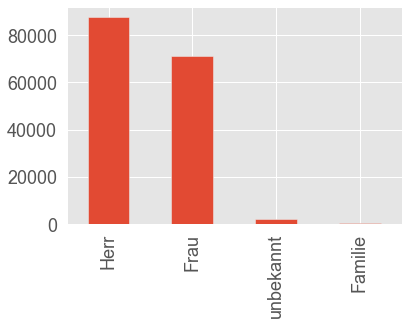

In [16]:
df.anrede.value_counts().plot(kind='bar');

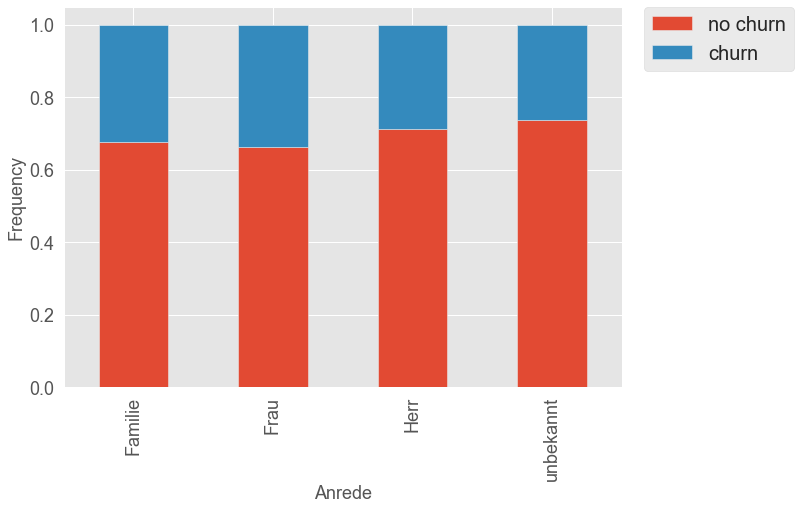

In [17]:
anrede_churn = crosstab_evaluation(df.anrede,df.churn)
crosstab_barplot(anrede_churn,['no churn','churn'],xlabelname='Anrede')

### Titel

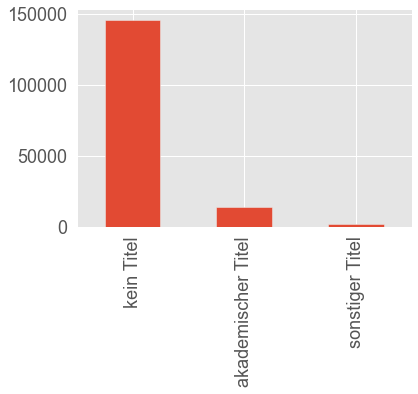

In [18]:
df.titel.value_counts().plot(kind='bar');

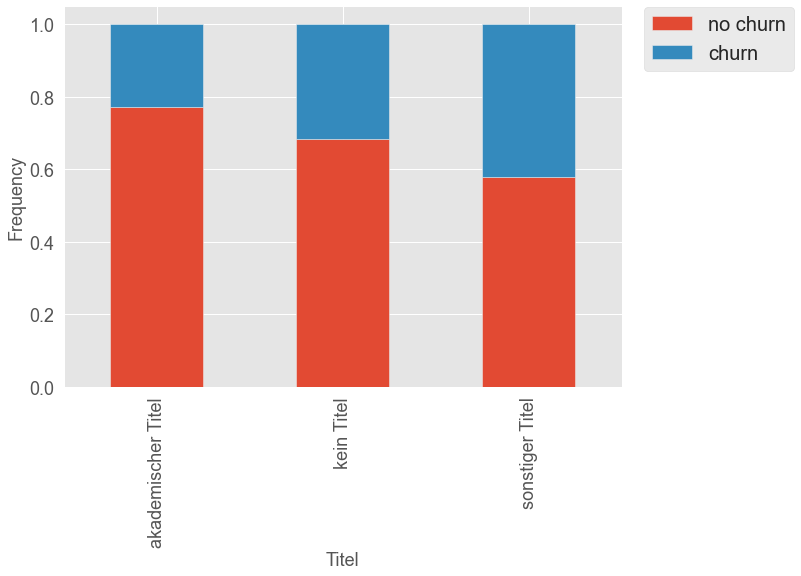

In [19]:
titel_churn = crosstab_evaluation(df.titel,df.churn)
crosstab_barplot(titel_churn,['no churn','churn'],xlabelname='Titel')

### PLZ 1 

Find the missing number of zip codes:

In [20]:
df_zip_xx = df[df.plz_1 == 'xx']
print('Number of missing zip codes entries:',df_zip_xx.shape[0])
print('Percentage of missing zip codes in total:',df_zip_xx.shape[0]/df.shape[0])

Number of missing zip codes entries: 19788
Percentage of missing zip codes in total: 0.12232937685459941


There are 19788 entries with no zip code, which is about 12 percent. 

In [21]:
df_zip_xx.ort.value_counts().nlargest(10)

Wien          3966
Zürich        1359
Basel         580 
Graz          573 
Innsbruck     406 
Salzburg      352 
Bern          347 
Linz          325 
Winterthur    148 
Luzern        134 
Name: ort, dtype: int64

The xx zip codes are all non german cities (e.g. Switzerland), so we could divide the dataset into germany and out of germany areas.

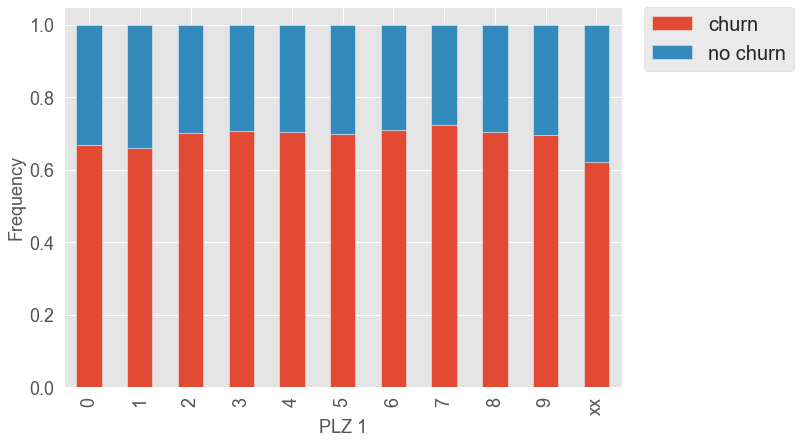

In [22]:
plz1_churn = crosstab_evaluation(df.plz_1,df.churn)
crosstab_barplot(plz1_churn,['churn','no churn'],xlabelname='PLZ 1')

### PLZ 2

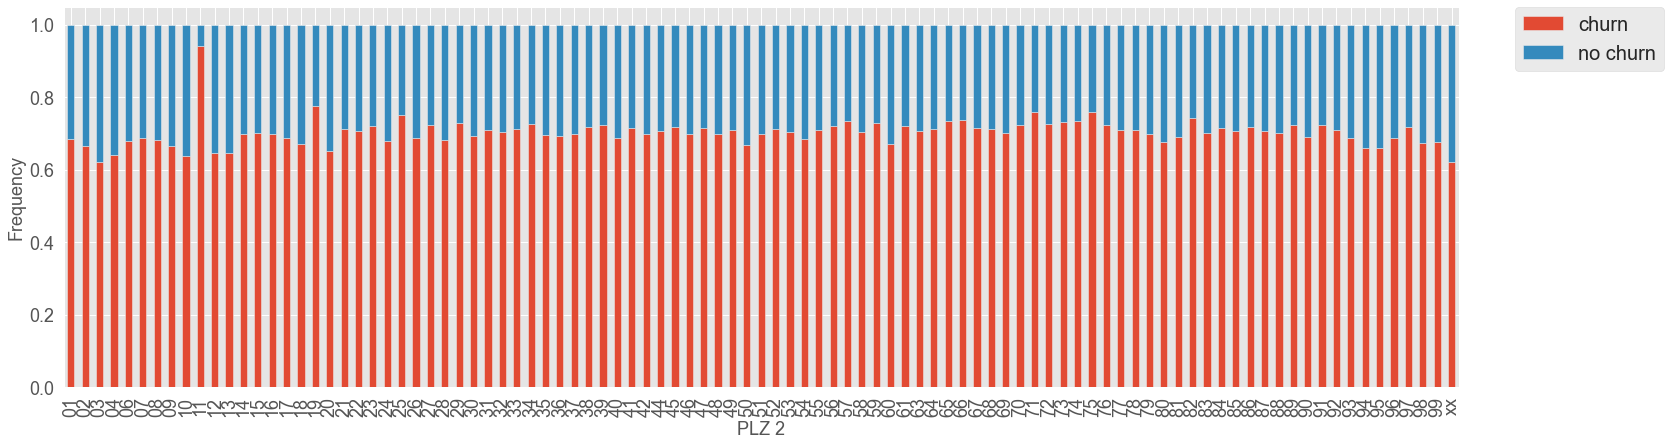

In [23]:
plz2_churn = crosstab_evaluation(df.plz_2,df.churn)
crosstab_barplot(plz2_churn,['churn','no churn'],xlabelname='PLZ 2',figsize_x=25)

In [24]:
# dataframe to map below
type(plz2_churn)

pandas.core.frame.DataFrame

### PLZ 3

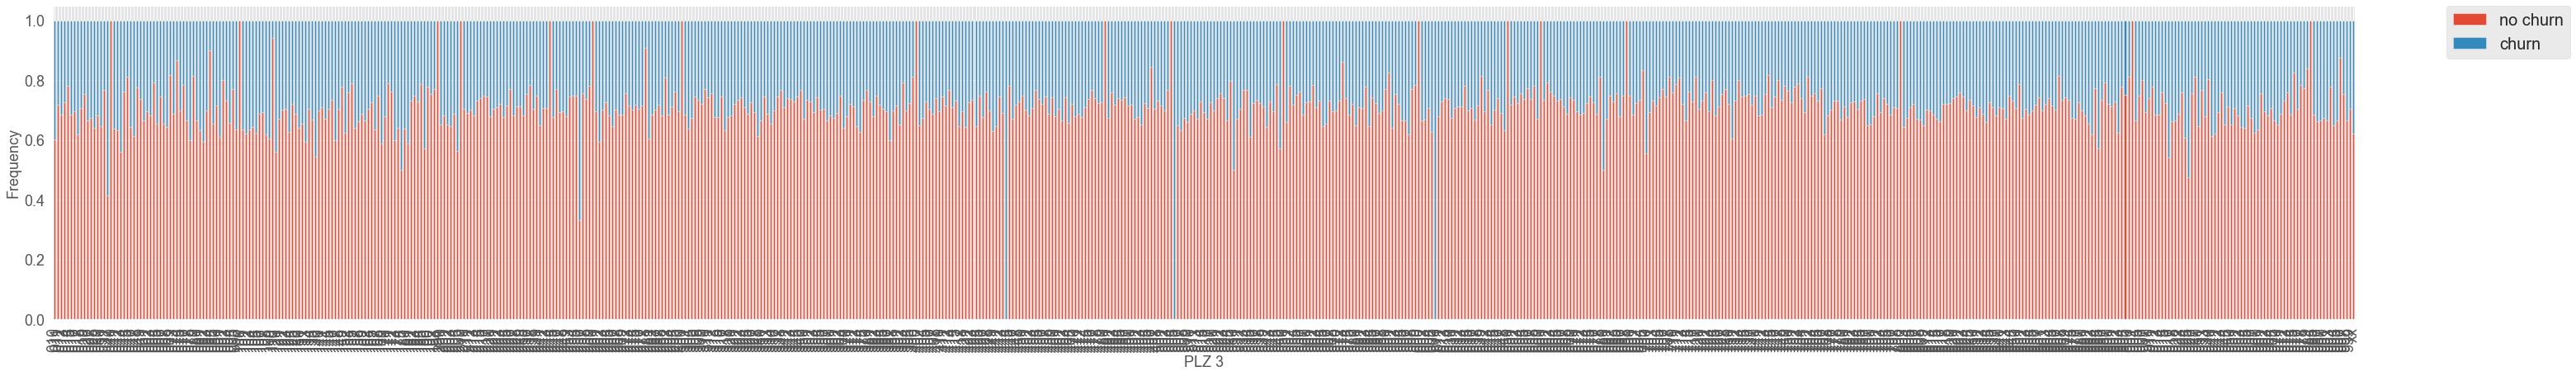

In [25]:
plz3_churn = crosstab_evaluation(df.plz_3,df.churn)
crosstab_barplot(plz3_churn,['no churn','churn'],xlabelname='PLZ 3',figsize_x=50)

Link zu geopandas für Deutschland: https://juanitorduz.github.io/germany_plots/

In [26]:
# geodata
plz_shape_df = gpd.read_file('data/plz-gebiete.shp', dtype={'plz': str})

plz_shape_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 8706 entries, 0 to 8705
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   plz       8706 non-null   object  
 1   note      8706 non-null   object  
 2   geometry  8706 non-null   geometry
dtypes: geometry(1), object(2)
memory usage: 204.2+ KB


In [27]:
top_cities = {
    'Berlin': (13.404954, 52.520008), 
    'Cologne': (6.953101, 50.935173),
    'Düsseldorf': (6.782048, 51.227144),
    'Frankfurt am Main': (8.682127, 50.110924),
    'Hamburg': (9.993682, 53.551086),
    'Leipzig': (12.387772, 51.343479),
    'Munich': (11.576124, 48.137154),
    'Dortmund': (7.468554, 51.513400),
    'Stuttgart': (9.181332, 48.777128),
    'Nuremberg': (11.077438, 49.449820),
    'Hannover': (9.73322, 52.37052)
}

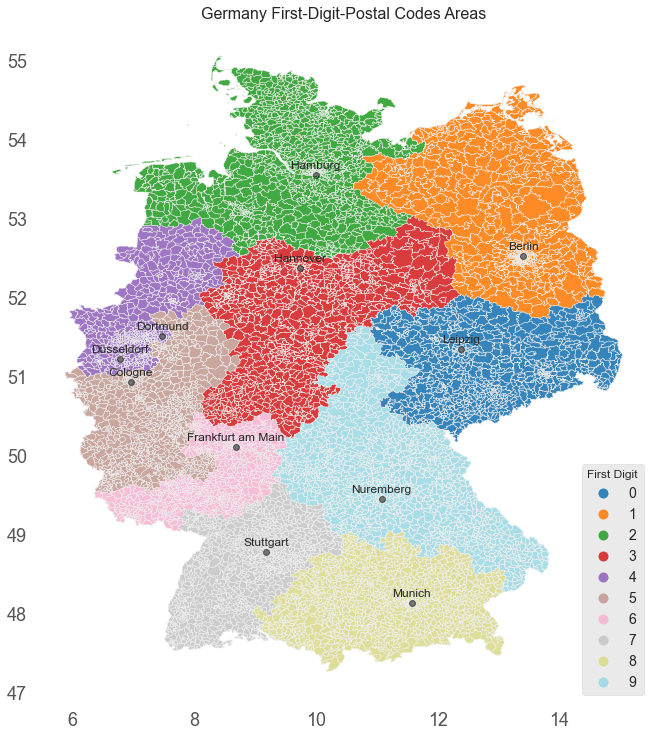

In [30]:
# Create feature.
plz_shape_df = plz_shape_df \
    .assign(first_dig_plz = lambda x: x['plz'].str.slice(start=0, stop=1))
fig, ax = plt.subplots(figsize=(11,16))

plz_shape_df.plot(
    ax=ax, 
    column='first_dig_plz', 
    categorical=True, 
    legend=True, 
    legend_kwds={'title':'First Digit', 'loc':'lower right'},
    cmap='tab20',
    alpha=0.9
)

for c in top_cities.keys():

    ax.text(
        x=top_cities[c][0], 
        y=top_cities[c][1] + 0.08, 
        s=c, 
        fontsize=12,
        ha='center', 
    )

    ax.plot(
        top_cities[c][0], 
        top_cities[c][1], 
        marker='o',
        c='black', 
        alpha=0.5
    )

ax.set(
    title='Germany First-Digit-Postal Codes Areas', 
    aspect=1.3,
    facecolor='white'
);

In [31]:
plz_region_df = pd.read_csv(
    'data/zuordnung_plz_ort.csv', 
    sep=',', 
    dtype={'plz': str}
)

plz_region_df.drop('osm_id', axis=1, inplace=True)

plz_region_df.head()

ort    plz           bundesland
0  Aach    78267  Baden-Württemberg  
1  Aach    54298  Rheinland-Pfalz    
2  Aachen  52062  Nordrhein-Westfalen
3  Aachen  52064  Nordrhein-Westfalen
4  Aachen  52066  Nordrhein-Westfalen

In [32]:
# Merge data.
germany_df = pd.merge(
    left=plz_shape_df, 
    right=plz_region_df, 
    on='plz',
    how='inner'
)

germany_df.drop(['note'], axis=1, inplace=True)

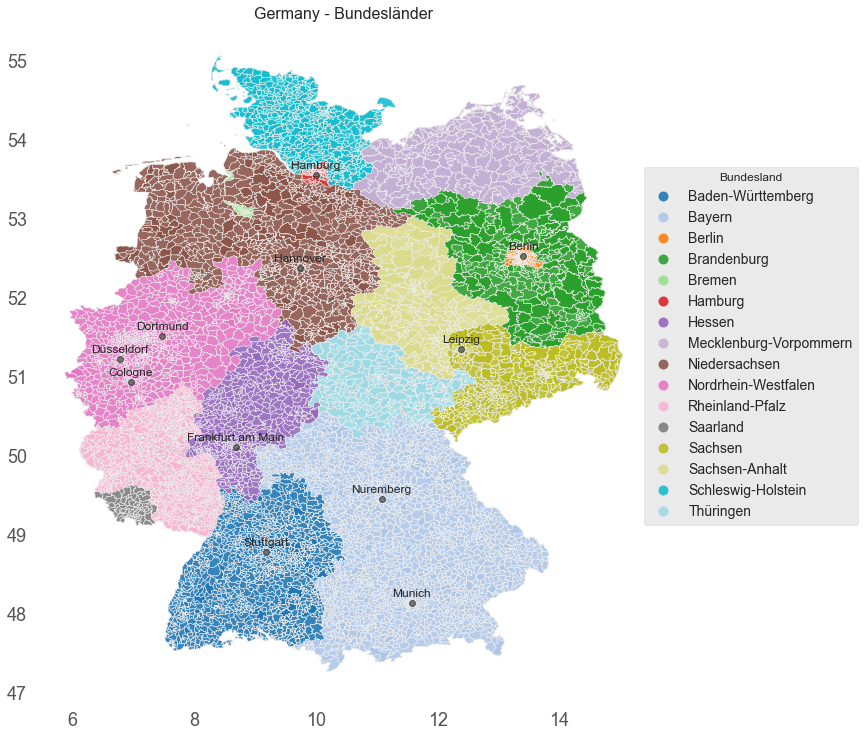

In [33]:
fig, ax = plt.subplots(figsize=(11,16))

germany_df.plot(
    ax=ax, 
    column='bundesland', 
    categorical=True, 
    legend=True, 
    legend_kwds={'title':'Bundesland', 'bbox_to_anchor': (1.35, 0.8)},
    cmap='tab20',
    alpha=0.9
)

for c in top_cities.keys():

    ax.text(
        x=top_cities[c][0], 
        y=top_cities[c][1] + 0.08, 
        s=c, 
        fontsize=12,
        ha='center', 
    )

    ax.plot(
        top_cities[c][0], 
        top_cities[c][1], 
        marker='o',
        c='black', 
        alpha=0.5
    )

ax.set(
    title='Germany - Bundesländer', 
    aspect=1.3, 
    facecolor='white'
);

In [34]:
plz1_churn

churn         0         1
plz_1                    
0      0.667609  0.332391
1      0.660144  0.339856
2      0.700604  0.299396
3      0.706629  0.293371
4      0.704886  0.295114
5      0.699679  0.300321
6      0.711066  0.288934
7      0.724816  0.275184
8      0.704273  0.295727
9      0.696045  0.303955
xx     0.622903  0.377097

In [35]:
plz2_churn.index[0]

'01'

In [36]:
def convert_plz_1_to_prob(plz):
    index = str(plz)[0]
    #print(index)
    value = plz1_churn.iloc[int(index),1]
    return value

def convert_plz_2_to_prob(plz):
    index = str(plz)[0:2]
    #print(index)
    value = plz2_churn[plz2_churn.index == index].iloc[0,1]
    #print(value)
    return value

def convert_plz_3_to_prob(plz):
    index = str(plz)[0:3]
    #print(index)
    value = plz3_churn[plz3_churn.index == index].iloc[0,1]
    #print(value)
    return value

In [37]:
germany_df['churn_plz_1'] = germany_df.plz.apply(lambda x: convert_plz_1_to_prob(x))

In [38]:
germany_df['churn_plz_2'] = germany_df.plz.apply(lambda x: convert_plz_2_to_prob(x))

In [39]:
germany_df['churn_plz_3'] = germany_df.plz.apply(lambda x: convert_plz_3_to_prob(x))

In [40]:
plz_einwohner_df = pd.read_csv(
    'data/plz_einwohner.csv', 
    sep=',', 
    dtype={'plz': str, 'einwohner': int}
)

plz_einwohner_df.head()

plz  einwohner
0  01067  11957    
1  01069  25491    
2  01097  14811    
3  01099  28021    
4  01108  5876

In [41]:
# Merge data.
germany_df = pd.merge(
    left=germany_df, 
    right=plz_einwohner_df, 
    on='plz',
    how='left'
)

#germany_df.head()

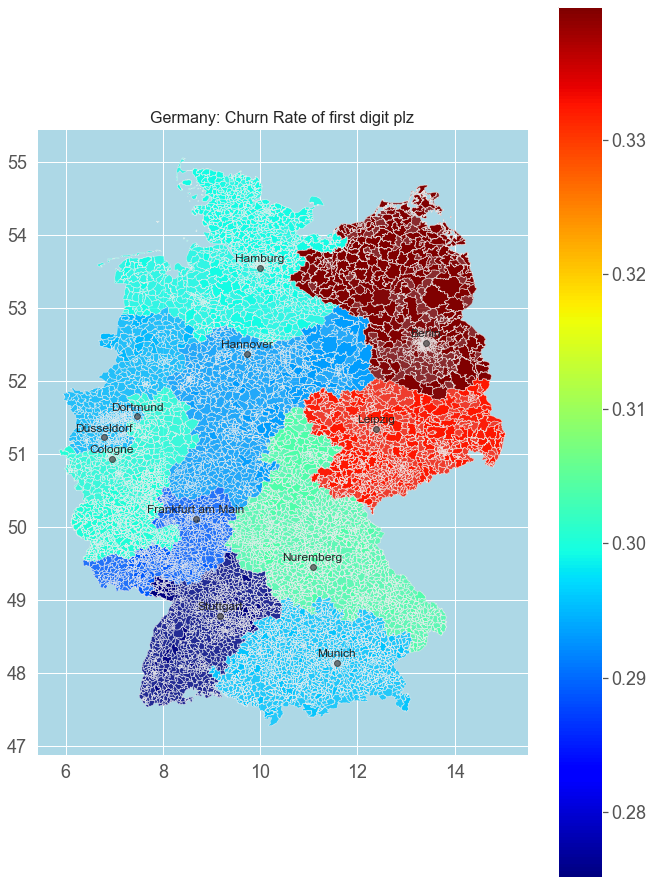

In [42]:
fig, ax = plt.subplots(figsize=(11,16))

germany_df.plot(
    ax=ax, 
    column='churn_plz_1', 
    categorical=False, 
    legend=True, 
    cmap='jet',
    alpha=0.8,

)

for c in top_cities.keys():

    ax.text(
        x=top_cities[c][0], 
        y=top_cities[c][1] + 0.08, 
        s=c, 
        fontsize=12,
        ha='center', 
    )

    ax.plot(
        top_cities[c][0], 
        top_cities[c][1], 
        marker='o',
        c='black', 
        alpha=0.5
    )
    
ax.set(
    title='Germany: Churn Rate of first digit plz', 
    aspect=1.5, 
    facecolor='lightblue'
);
fig.savefig('plots/churn_rate_landscape_plz_1_digit.png',dpi=300)

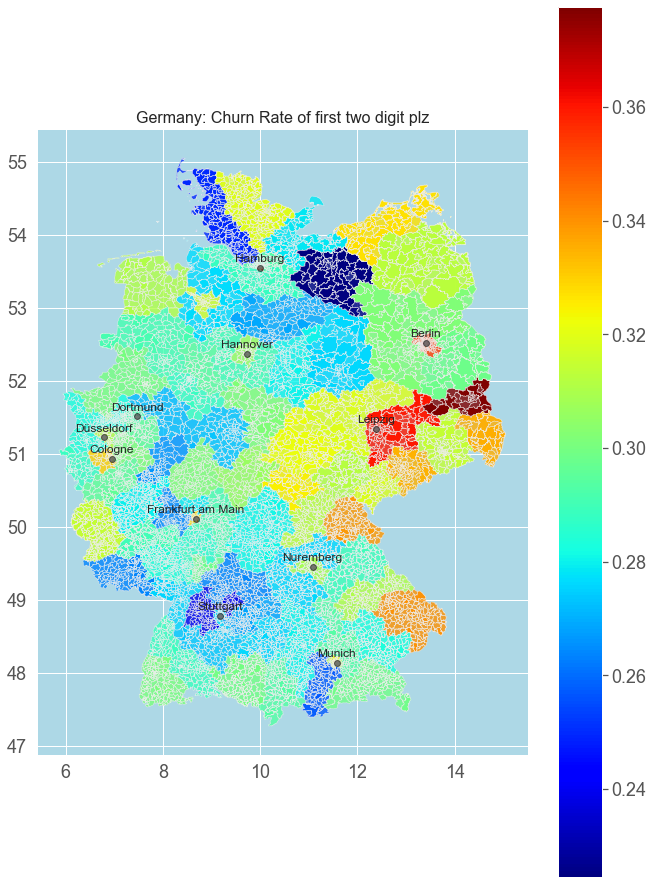

In [43]:
fig, ax = plt.subplots(figsize=(11,16))

germany_df.plot(
    ax=ax, 
    column='churn_plz_2', 
    categorical=False, 
    legend=True, 
    cmap='jet',
    alpha=0.8,

)

for c in top_cities.keys():

    ax.text(
        x=top_cities[c][0], 
        y=top_cities[c][1] + 0.08, 
        s=c, 
        fontsize=12,
        ha='center', 
    )

    ax.plot(
        top_cities[c][0], 
        top_cities[c][1], 
        marker='o',
        c='black', 
        alpha=0.5
    )
    
ax.set(
    title='Germany: Churn Rate of first two digit plz', 
    aspect=1.5, 
    facecolor='lightblue'
);
fig.savefig('plots/churn_rate_landscape_plz_2_digit.png',dpi=300)

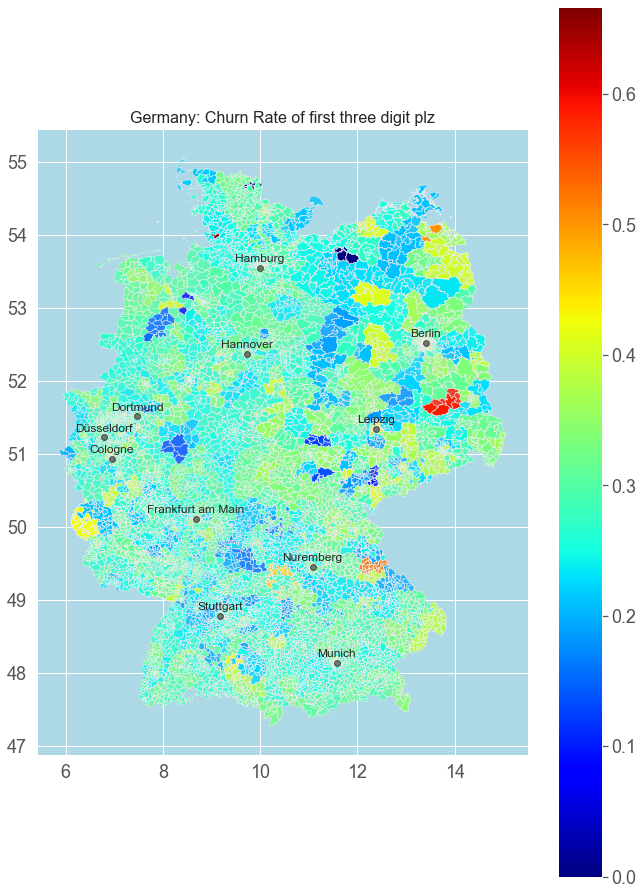

In [44]:
fig, ax = plt.subplots(figsize=(11,16))

germany_df.plot(
    ax=ax, 
    column='churn_plz_3', 
    categorical=False, 
    legend=True, 
    cmap='jet',
    alpha=0.8,

)

for c in top_cities.keys():

    ax.text(
        x=top_cities[c][0], 
        y=top_cities[c][1] + 0.08, 
        s=c, 
        fontsize=12,
        ha='center', 
    )

    ax.plot(
        top_cities[c][0], 
        top_cities[c][1], 
        marker='o',
        c='black', 
        alpha=0.5
    )
    
ax.set(
    title='Germany: Churn Rate of first three digit plz', 
    aspect=1.5, 
    facecolor='lightblue'
);
fig.savefig('plots/churn_rate_landscape_plz_3_digit.png',dpi=300)

### Metropole

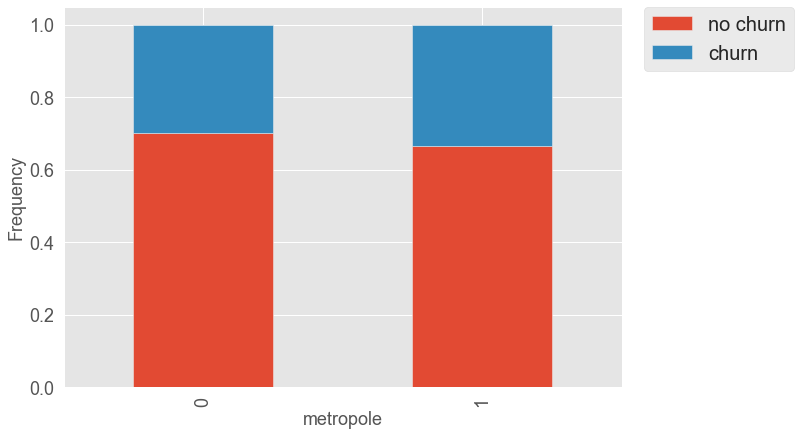

In [45]:
metropole_churn = crosstab_evaluation(df.metropole,df.churn)
crosstab_barplot(metropole_churn,['no churn','churn'],xlabelname='metropole')

### Land iso code

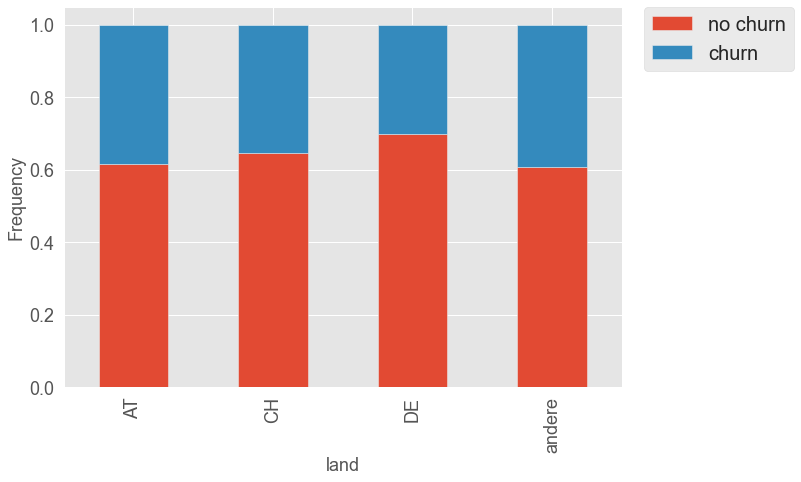

In [46]:
land_iso_churn = crosstab_evaluation(df.land_iso_code,df.churn)
crosstab_barplot(land_iso_churn,['no churn','churn'],xlabelname='land')

### Ort/City

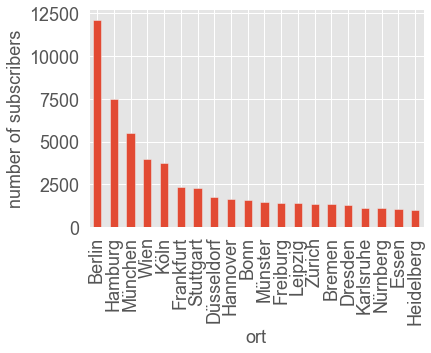

In [47]:
a = df.groupby('ort').size().nlargest(20)
a.plot(kind='bar',ylabel='number of subscribers');

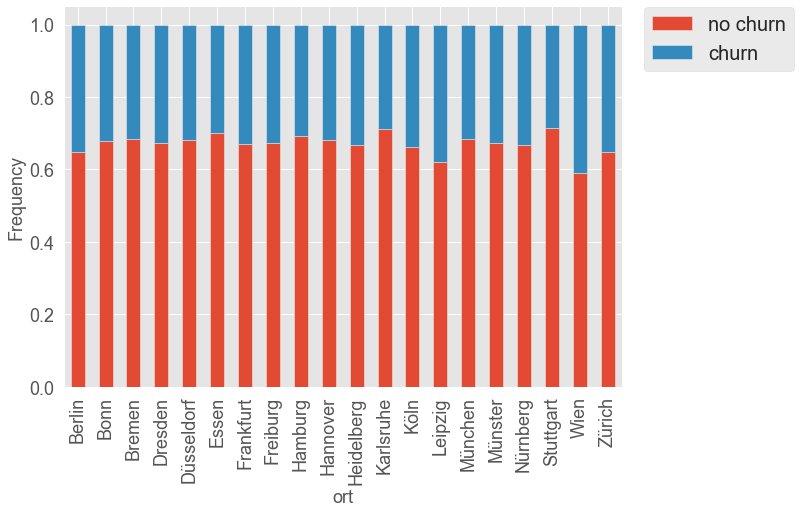

In [48]:
b = list(a.index)
df_top_cities = df[df['ort'].apply((lambda x: x in b))]

ort_churn = crosstab_evaluation(df_top_cities.ort,df_top_cities.churn)
crosstab_barplot(ort_churn,['no churn','churn'],xlabelname='ort')

### Summary Customer Data

## Subscription Features - Jonas

The following features are related to the subscription kind and shortly described:

- kanal
- objekt_name 
- aboform_name
- zahlung_rhythmus_name
- rechnungsmonat
- zahlung_weg_name 
- studentenabo
- unterbrechung

### Kanal

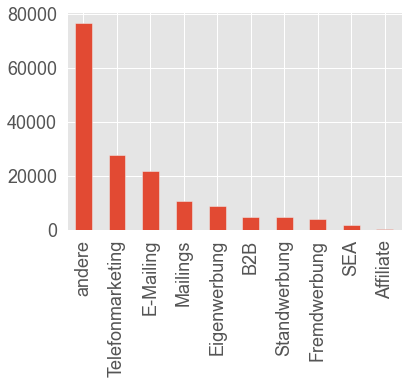

In [49]:
df.kanal.value_counts().plot(kind='bar');

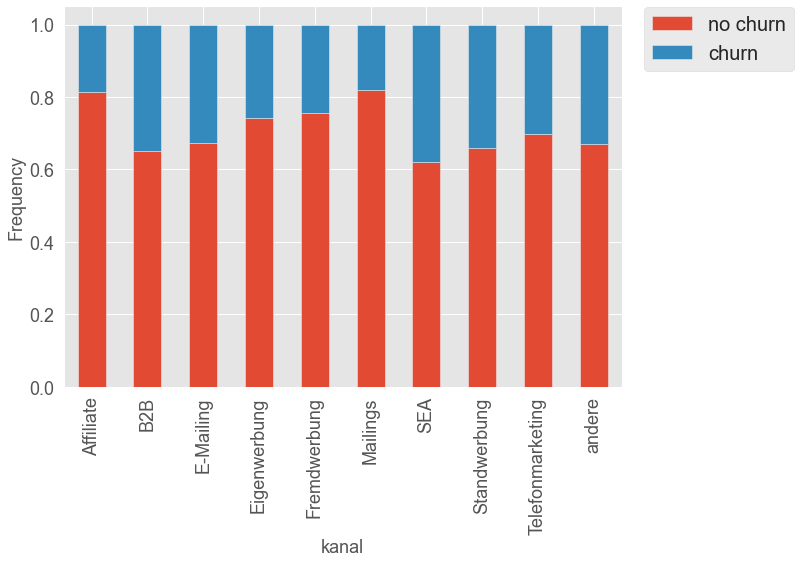

In [50]:
kanal_churn = crosstab_evaluation(df.kanal,df.churn)
crosstab_barplot(kanal_churn,['no churn','churn'],xlabelname='kanal')

(0.0, 10.0)

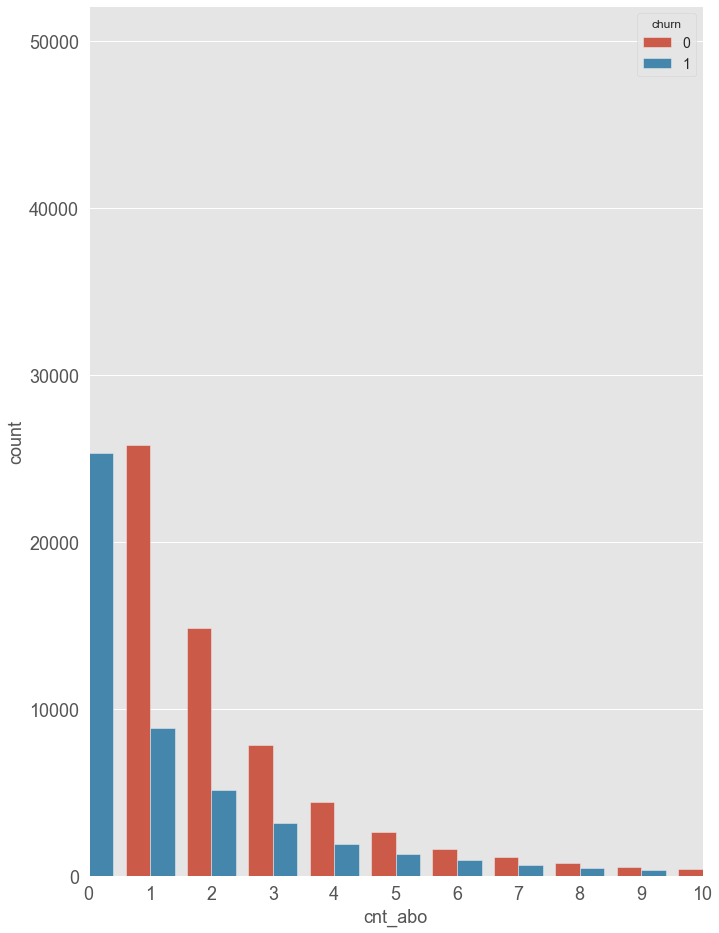

In [51]:
fig, ax = plt.subplots(figsize=(11,16))
ax = sns.countplot(x="cnt_abo", hue='churn',data=df)
ax.set_xlim(0,10)

### objekt_name

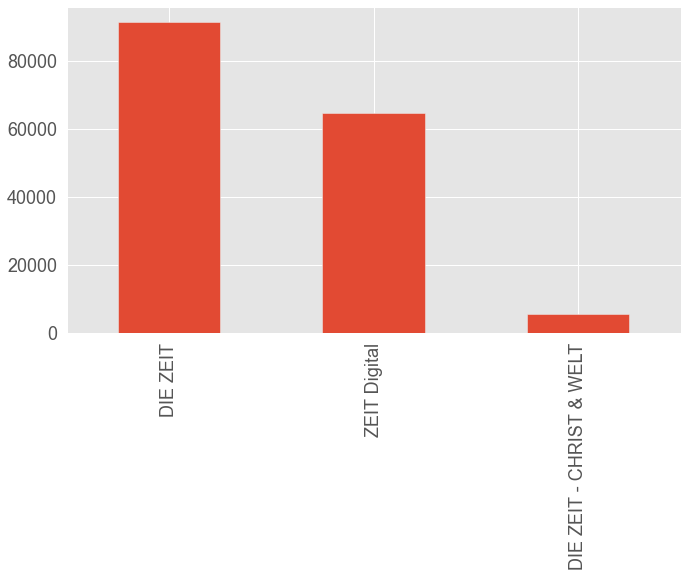

In [52]:
df.objekt_name.value_counts().plot(kind='bar',figsize=(11,6));

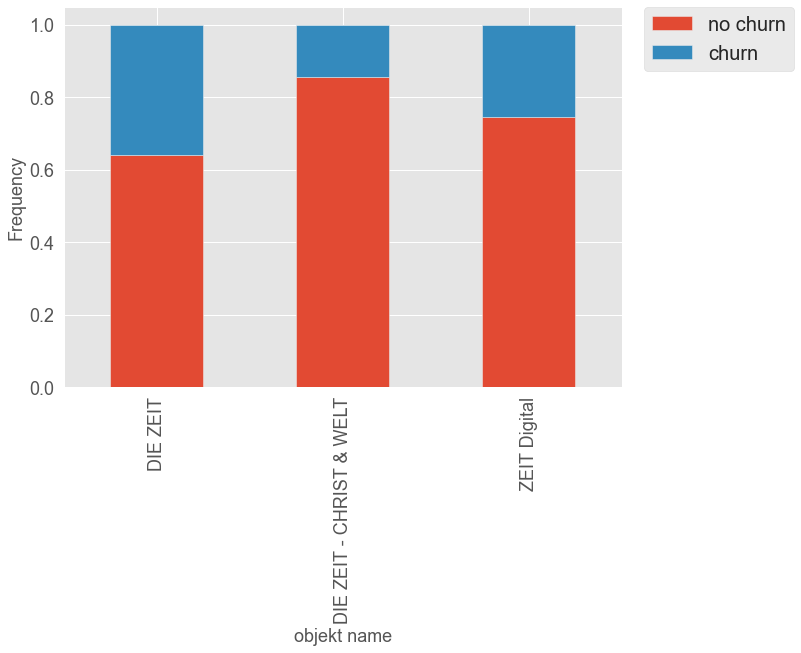

In [53]:
objekt_churn = crosstab_evaluation(df.objekt_name,df.churn)
crosstab_barplot(objekt_churn,['no churn','churn'],xlabelname='objekt name')

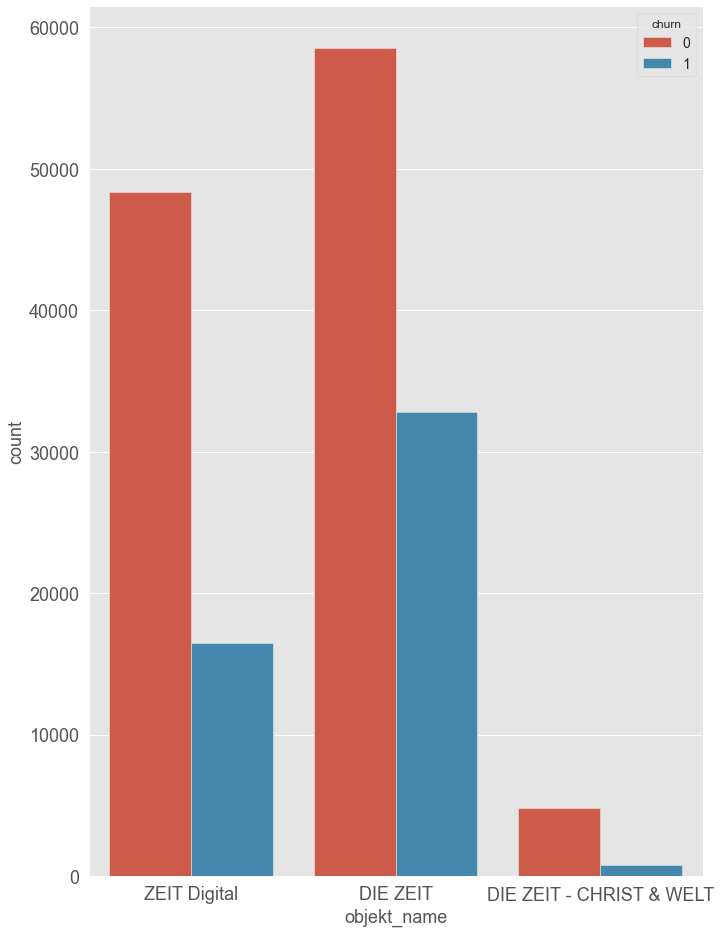

In [54]:
fig, ax = plt.subplots(figsize=(11,16))
ax = sns.countplot(x="objekt_name", hue='churn',data=df)

### aboform_name

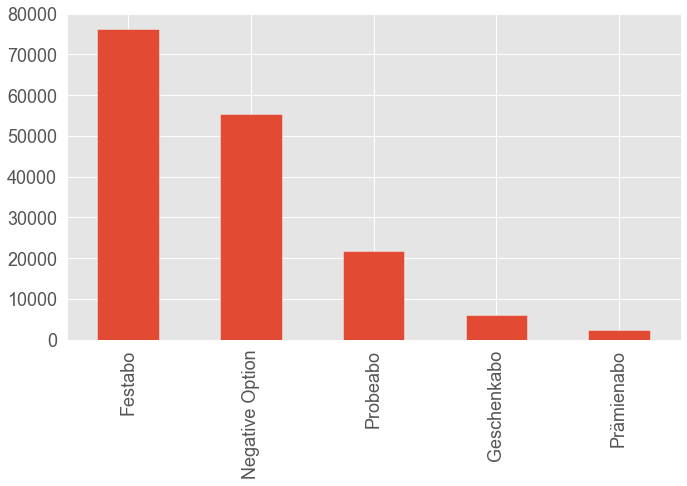

In [55]:
df.aboform_name.value_counts().plot(kind='bar',figsize=(11,6));

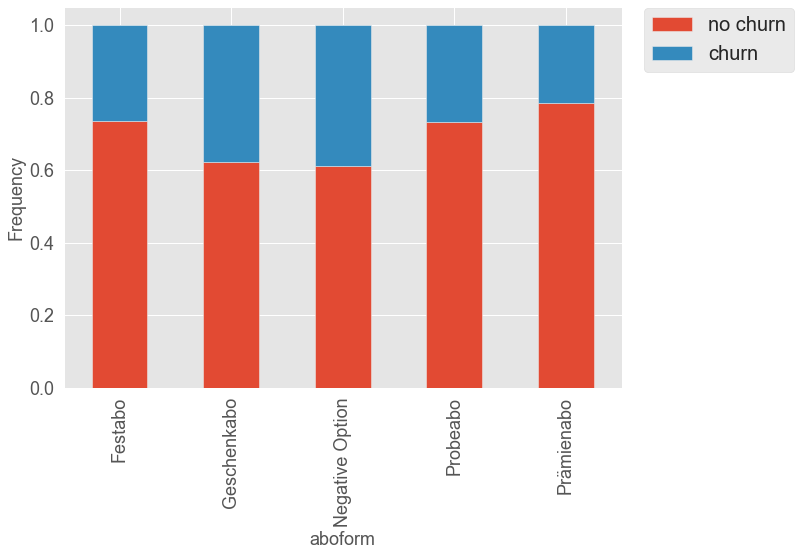

In [56]:
aboform_churn = crosstab_evaluation(df.aboform_name,df.churn)
crosstab_barplot(aboform_churn,['no churn','churn'],xlabelname='aboform')

### zahlung_rhythmus_name

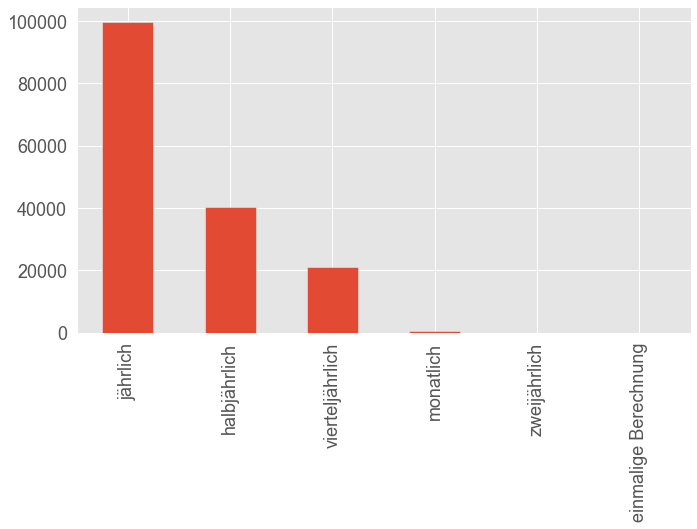

In [57]:
df.zahlung_rhythmus_name.value_counts().plot(kind='bar',figsize=(11,6));

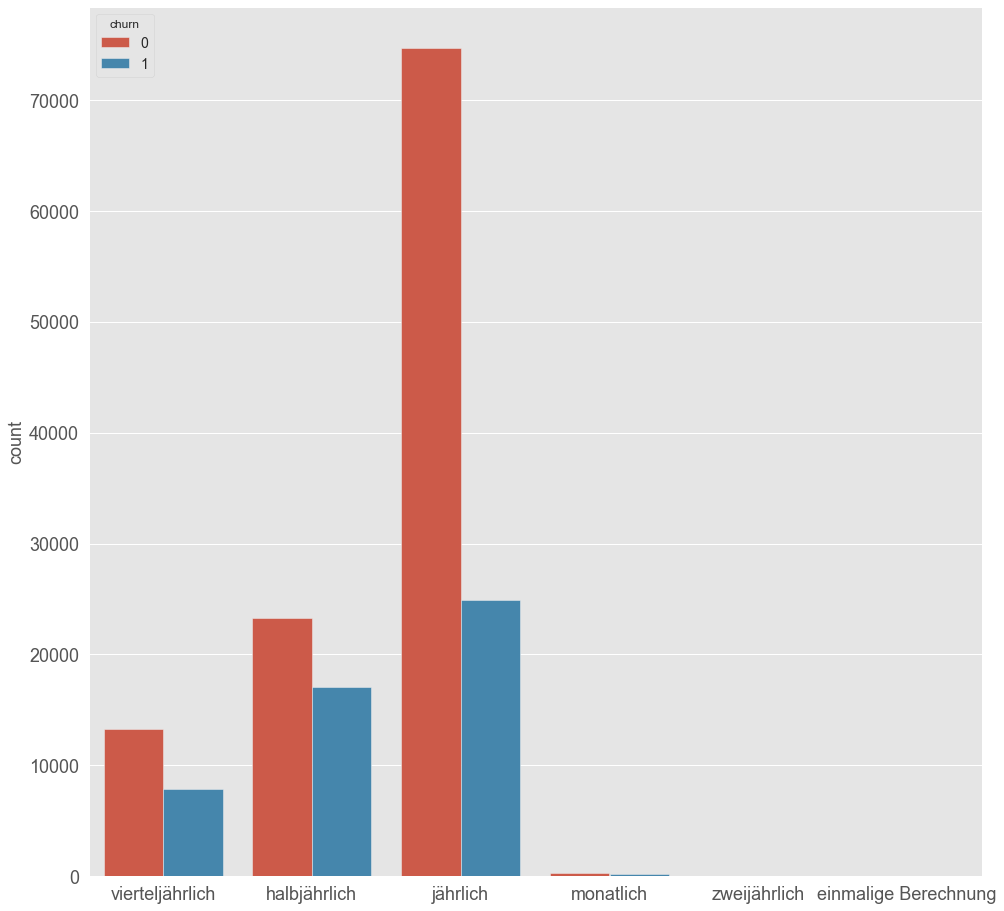

In [58]:
fig, ax = plt.subplots(figsize=(16,16))
ax = sns.countplot(x='zahlung_rhythmus_name',data=df,hue='churn')
ax.set_xlabel('');

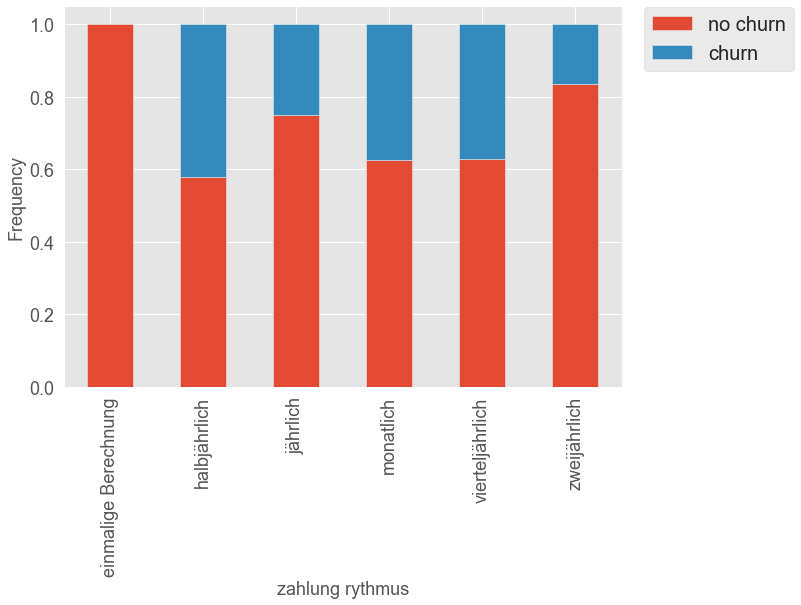

In [59]:
zahlung_rythmus_churn = crosstab_evaluation(df.zahlung_rhythmus_name,df.churn)
crosstab_barplot(zahlung_rythmus_churn,['no churn','churn'],xlabelname='zahlung rythmus')

### rechnungsmonat

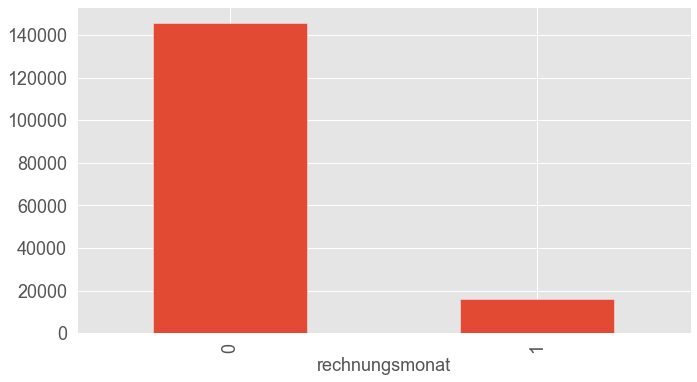

In [60]:
df.rechnungsmonat.value_counts().plot(kind='bar',figsize=(11,6));
plt.xlabel('rechnungsmonat');

Rechnungsmonat? What is the meaning?

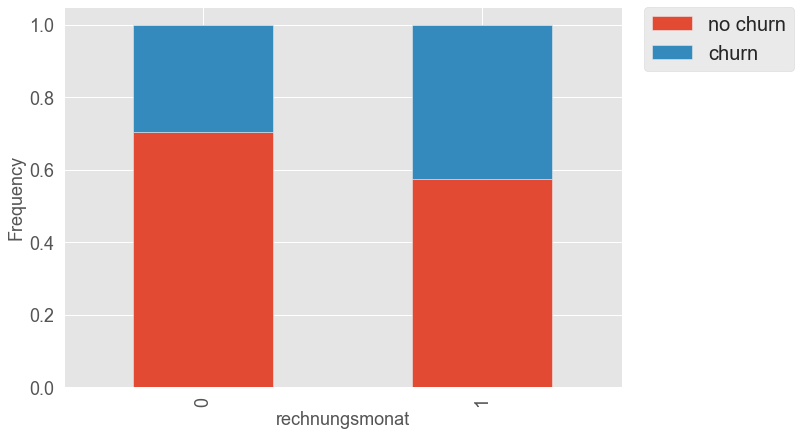

In [61]:
rechnungsmonat_churn = crosstab_evaluation(df.rechnungsmonat,df.churn)
crosstab_barplot(rechnungsmonat_churn,['no churn','churn'],xlabelname='rechnungsmonat')

### zahlung_weg_name

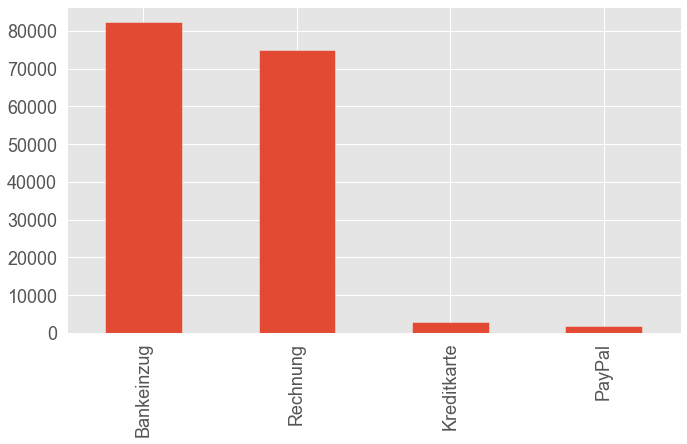

In [62]:
df.zahlung_weg_name.value_counts().plot(kind='bar',figsize=(11,6));

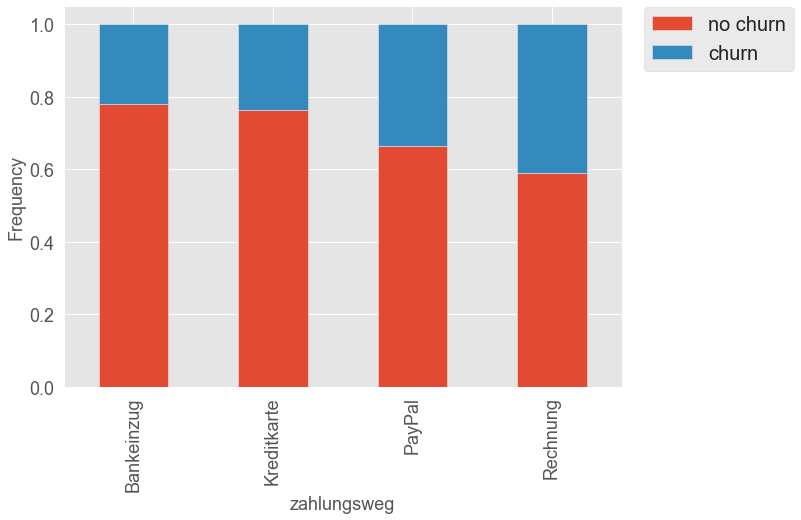

In [63]:
zahlungsweg_churn = crosstab_evaluation(df.zahlung_weg_name,df.churn)
crosstab_barplot(zahlungsweg_churn,['no churn','churn'],xlabelname='zahlungsweg')

### studentenabo

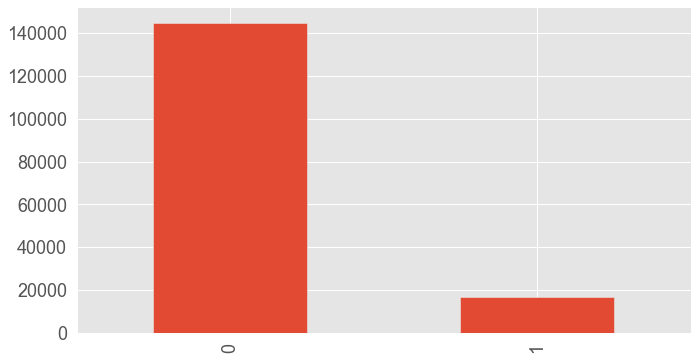

In [64]:
df.studentenabo.value_counts().plot(kind='bar',figsize=(11,6));

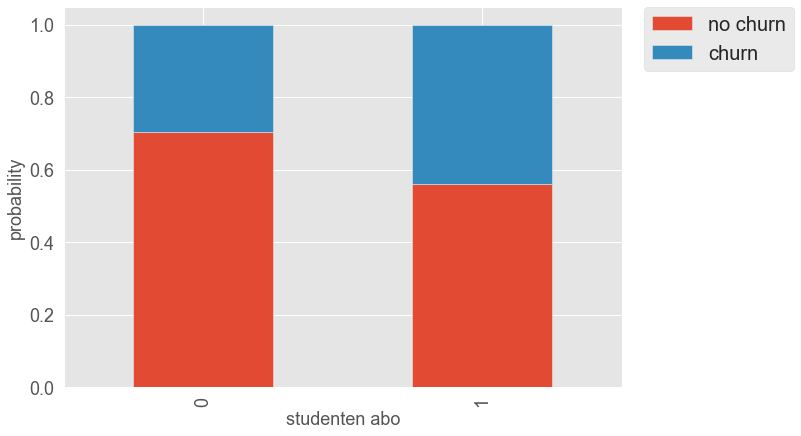

In [65]:
studentenabo_churn = crosstab_evaluation(df.studentenabo,df.churn)
crosstab_barplot(studentenabo_churn,['no churn','churn'],xlabelname='studenten abo')
plt.ylabel('probability');

#### Studentenmap

In [66]:
plz3_students = crosstab_evaluation(df.plz_3,df.studentenabo)
#crosstab_barplot(plz3_students,['no student abo','student abo'],xlabelname='PLZ 3',figsize_x=50)

In [67]:
def convert_plz_3_to_student(plz):
    index = str(plz)[0:3]
    #print(index)
    value = plz3_students[plz3_students.index == index].iloc[0,1]
    #print(value)
    return value

In [68]:
germany_df['studenten_plz_3'] = germany_df.plz.apply(lambda x: convert_plz_3_to_student(x))

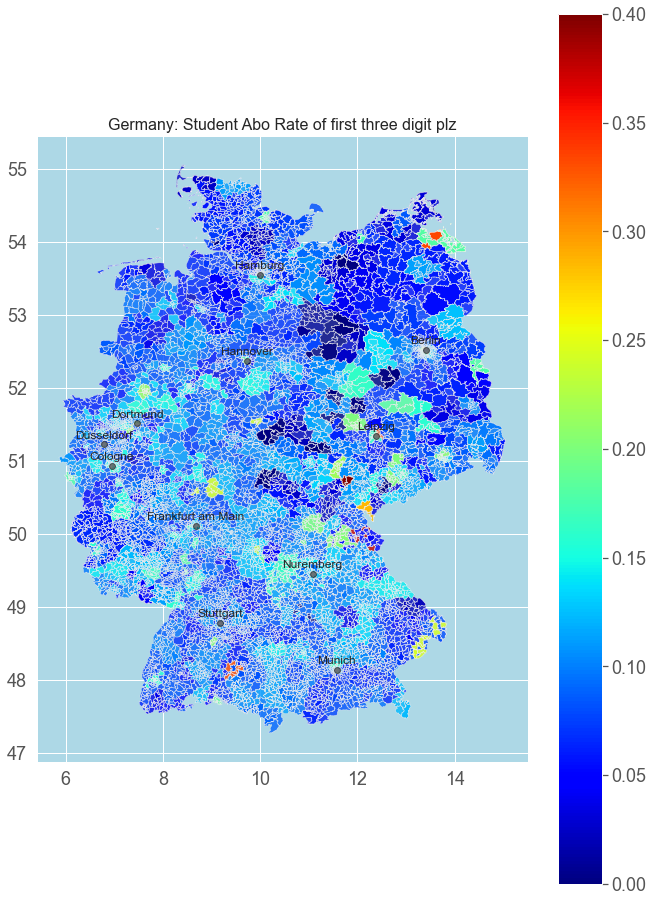

In [69]:
fig, ax = plt.subplots(figsize=(11,16))

germany_df.plot(
    ax=ax, 
    column='studenten_plz_3', 
    categorical=False, 
    legend=True, 
    cmap='jet',
    alpha=0.8,

)

for c in top_cities.keys():

    ax.text(
        x=top_cities[c][0], 
        y=top_cities[c][1] + 0.08, 
        s=c, 
        fontsize=12,
        ha='center', 
    )

    ax.plot(
        top_cities[c][0], 
        top_cities[c][1], 
        marker='o',
        c='black', 
        alpha=0.5
    )
    
ax.set(
    title='Germany: Student Abo Rate of first three digit plz', 
    aspect=1.5, 
    facecolor='lightblue'
);
fig.savefig('plots/student_abo_rate.png',dpi=300)

### unterbrechung

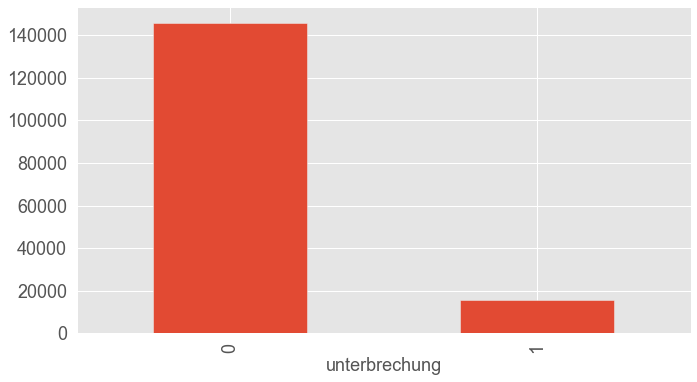

In [70]:
df.unterbrechung.value_counts().plot(kind='bar',figsize=(11,6));
plt.xlabel('unterbrechung');

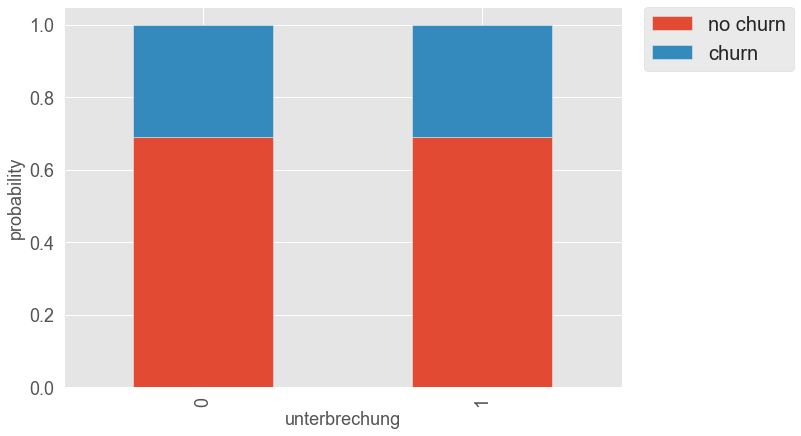

In [71]:
unterbrechung_churn = crosstab_evaluation(df.unterbrechung,df.churn)
crosstab_barplot(unterbrechung_churn,['no churn','churn'],xlabelname='unterbrechung')
plt.ylabel('probability');

### Summary Subscription Data

## Time/Temporal Features

The following features are related to time subscription kind and shortly described: 
- lesedauer
- liefer_beginn_evt
- abo_registrierung_min
- nl_registrierung_min

### lesedauer

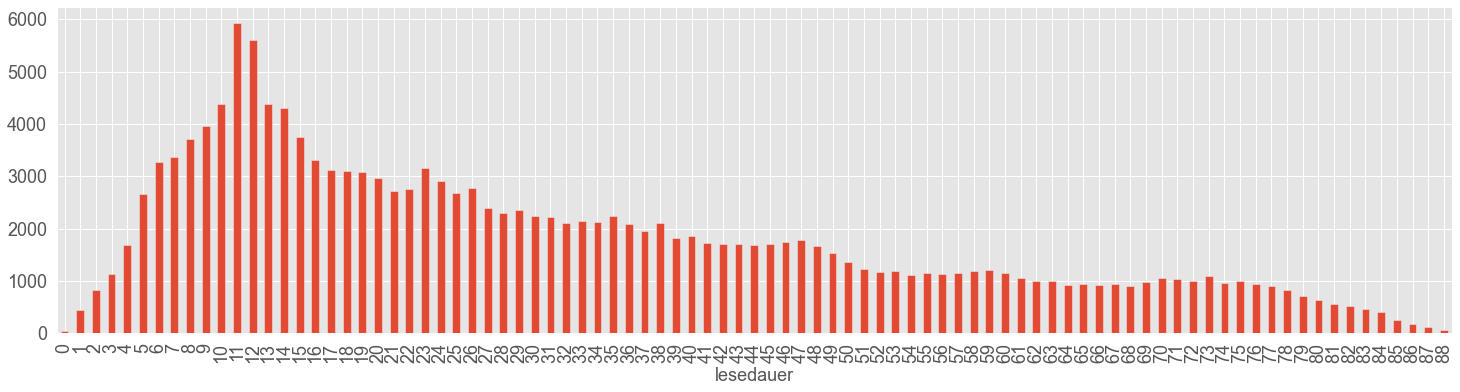

In [72]:
df.lesedauer.value_counts().sort_index().plot(kind='bar',figsize=(25,6));
#df.lesedauer.value_counts().sort_values('lesedauer').plot(kind='bar',figsize=(25,6));
plt.xlabel('lesedauer');

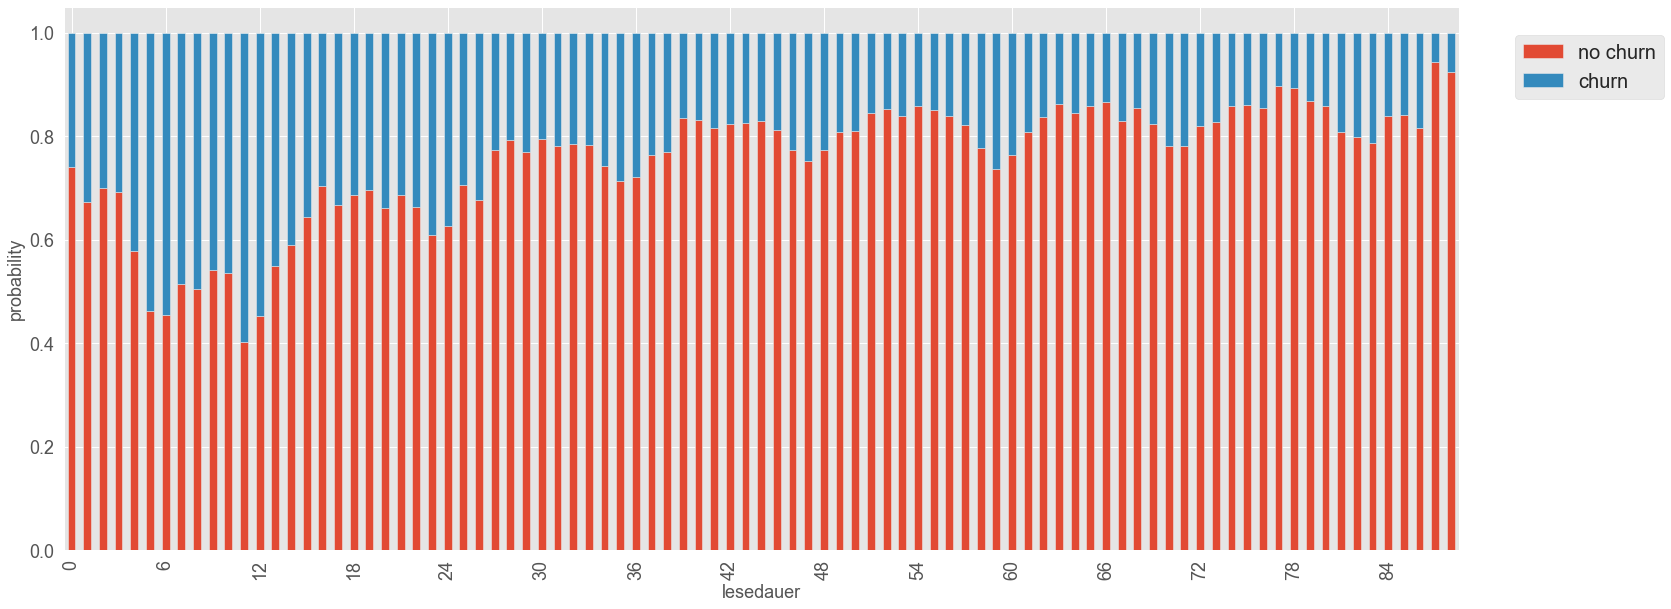

In [73]:
lesedauer_churn = crosstab_evaluation(df.lesedauer,df.churn)
crosstab_barplot(lesedauer_churn,['no churn','churn'],xlabelname='lesedauer',figsize_x=25,figsize_y=10)
plt.ylabel('probability');
plt.xticks(np.arange(0, 88, 6.0));

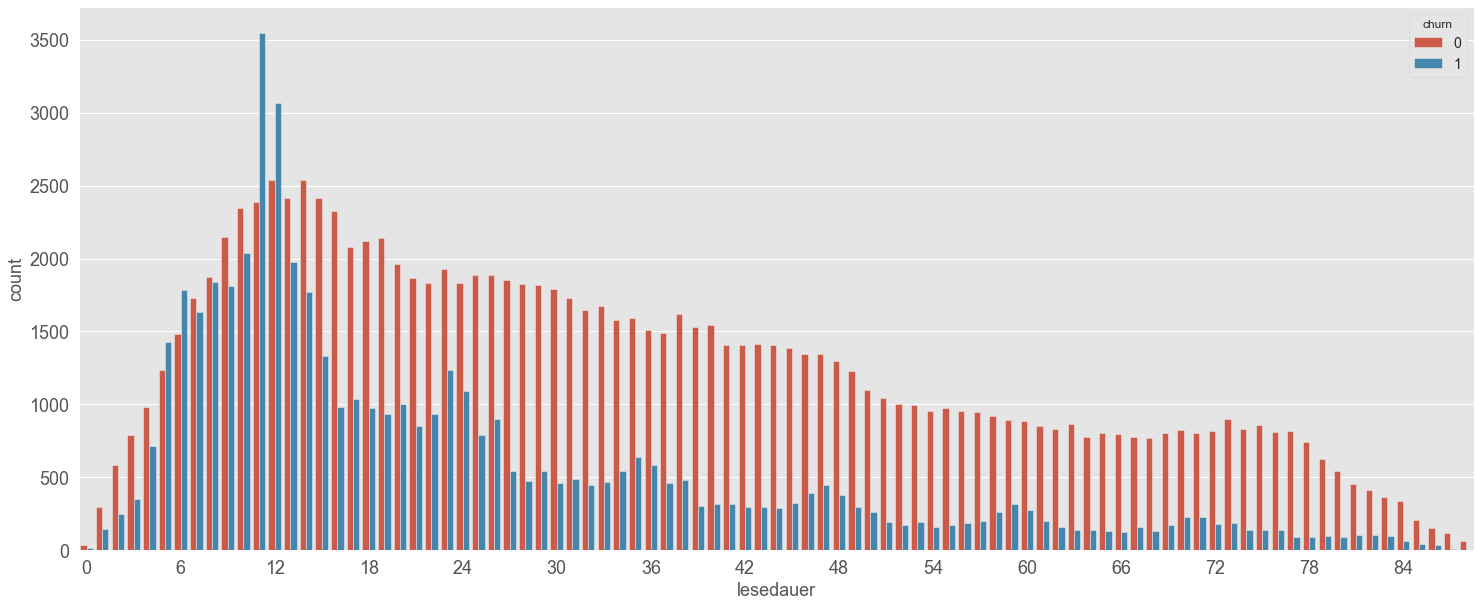

In [74]:
fig, ax = plt.subplots(figsize=(25,10))
ax = sns.countplot(x='lesedauer',data=df,hue='churn')
ax.set_xlabel('');
plt.xticks(np.arange(0, 88, 6.0));
plt.xlabel('lesedauer');

## Activity features

These features were we can see interactions and communicate with the customers.

- newsletter
- clickrates
- openrates
- community

The following section will look at the different Activity Features, split into the the __activity of the onlie Shop__, __Email-Newsletter activity__, the different Newsletter (__Bestandskunden__, __Produktnews__, __Hamburg__ and __Zeitbrief__), as well as the __Open and Clickrates__. <br>
Absolute and realtive observations will be considered. 

In [75]:
index=0
for elem in df.columns:
    index+=1
    print(f"{index} {elem}")

1 auftrag_new_id
2 liefer_beginn_evt
3 kanal
4 objekt_name
5 aboform_name
6 zahlung_rhythmus_name
7 lesedauer
8 rechnungsmonat
9 zahlung_weg_name
10 studentenabo
11 plz_1
12 plz_2
13 plz_3
14 ort
15 metropole
16 land_iso_code
17 shop_kauf
18 unterbrechung
19 anrede
20 titel
21 avg_churn
22 zon_che_opt_in
23 zon_sit_opt_in
24 zon_zp_grey
25 zon_premium
26 zon_boa
27 zon_kommentar
28 zon_sonstige
29 zon_zp_red
30 zon_rawr
31 zon_community
32 zon_app_sonstige
33 zon_schach
34 zon_blog_kommentare
35 zon_quiz
36 cnt_abo
37 cnt_abo_diezeit
38 cnt_abo_diezeit_digital
39 cnt_abo_magazin
40 cnt_umwandlungsstatus2_dkey
41 abo_registrierung_min
42 nl_zeitbrief
43 nl_zeitshop
44 nl_zeitverlag_hamburg
45 nl_fdz_organisch
46 nl_blacklist_sum
47 nl_bounced_sum
48 nl_aktivitaet
49 nl_registrierung_min
50 nl_sperrliste_sum
51 nl_opt_in_sum
52 boa_reg
53 che_reg
54 sit_reg
55 sso_reg
56 received_anzahl_1w
57 received_anzahl_1m
58 received_anzahl_3m
59 received_anzahl_6m
60 opened_anzahl_1w
61 opened_anz

In [76]:
df_zon = df.iloc[::, 21:35]                # zones are special areas that need registration
df_cnt = df.iloc[::, 35:40]                # cnt is the number of subscribtions the contract holds (families, libaries etc.)
df_nl = df.iloc[::, 41:51]                 # newsletter
df_nl_interact = df.iloc[::, 55:77]        # newsletter interactions
df_nl_bestandskunden = df.iloc[::, 77:99]  # newsletter existing customers
df_nl_produktnews = df.iloc[::, 99:121]    # productnews (kind of newsletter but more commercial)
df_nl_hamburg = df.iloc[::, 121:143]       # newsletter region hamburg
df_zb = df.iloc[::, 143:165]               # zb = zeitbrief kind of letter

In [77]:
df_list = [df, df_zon, df_cnt, df_nl, df_nl_interact, df_nl_bestandskunden, df_nl_produktnews, df_nl_hamburg, df_zb]

#for elem in df_list:
#    eda.correlogram(elem)

### Shop Kauf

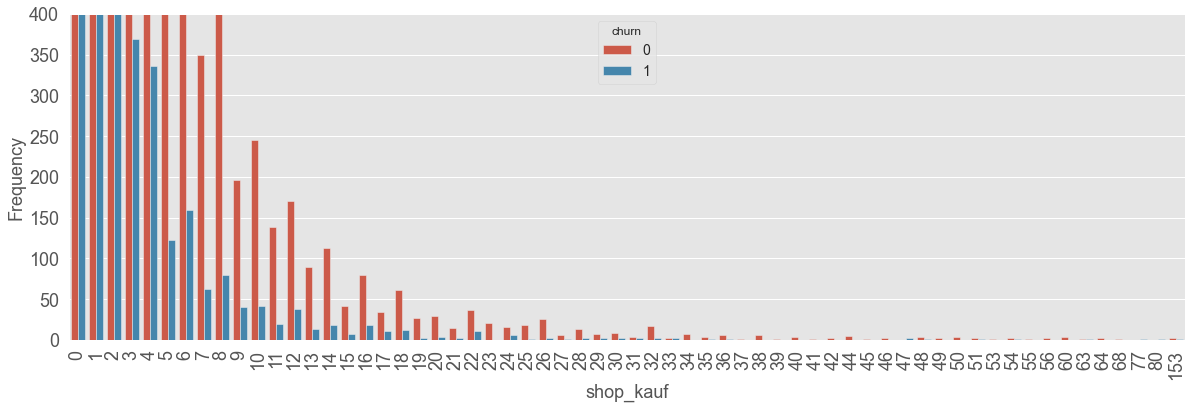

In [78]:
plt.subplots(figsize=(20,6))
ax = sns.countplot(x='shop_kauf', hue='churn', data=df)
ax.set(xlabel='shop_kauf', ylabel='Frequency')
ax.set(ylim=(0, 400))


ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

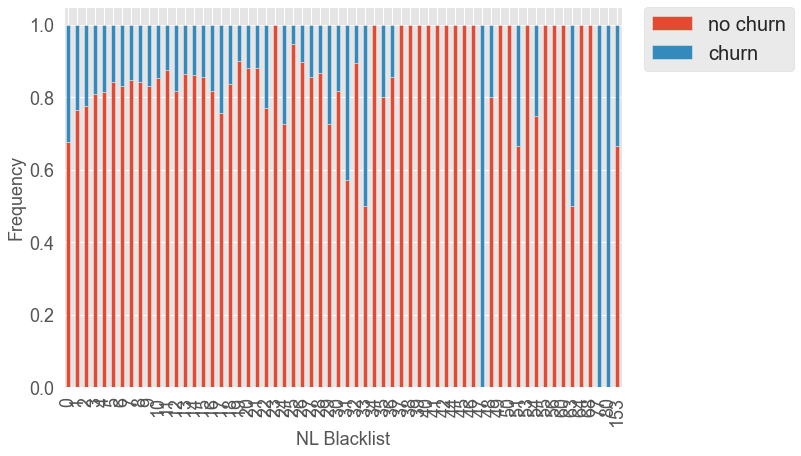

In [79]:
shop_churn = crosstab_evaluation(df.shop_kauf,df.churn)
crosstab_barplot(shop_churn,['no churn','churn'],xlabelname='NL Blacklist')

### Newsletter
* Blacklist
* Bounced
* Aktivität
* Sperrliste

__Absolute Blacklist and Bounced__

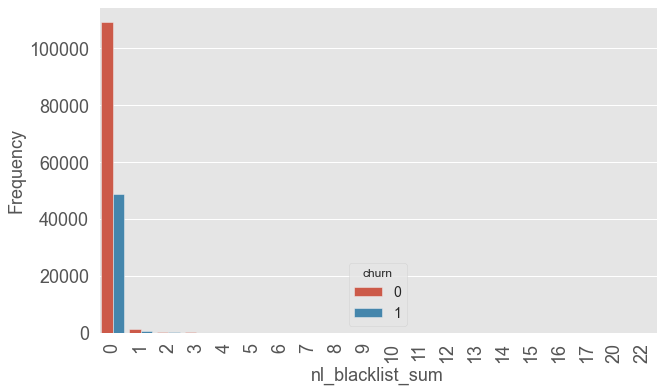

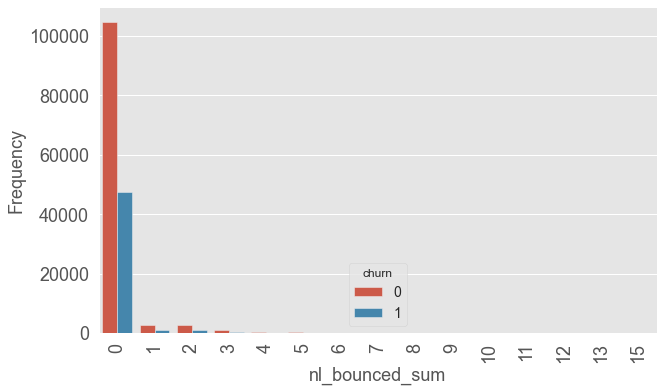

In [80]:
for i in ['nl_blacklist_sum', 'nl_bounced_sum']:
    
    
    plt.subplots(figsize=(10,6))
    ax = sns.countplot(x=i, hue='churn', data=df)
    ax.set(xlabel=i, ylabel='Frequency')

    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

__Relative Blacklist__

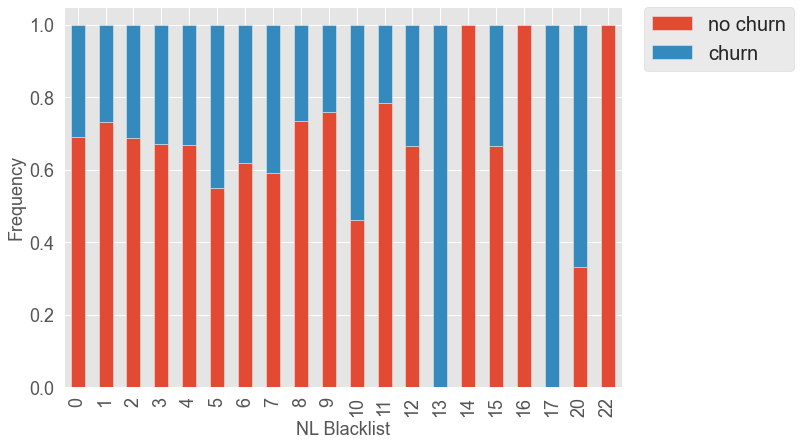

In [81]:
blacklist_churn = crosstab_evaluation(df.nl_blacklist_sum,df.churn)
crosstab_barplot(blacklist_churn,['no churn','churn'],xlabelname='NL Blacklist')

__Relative Bounced__

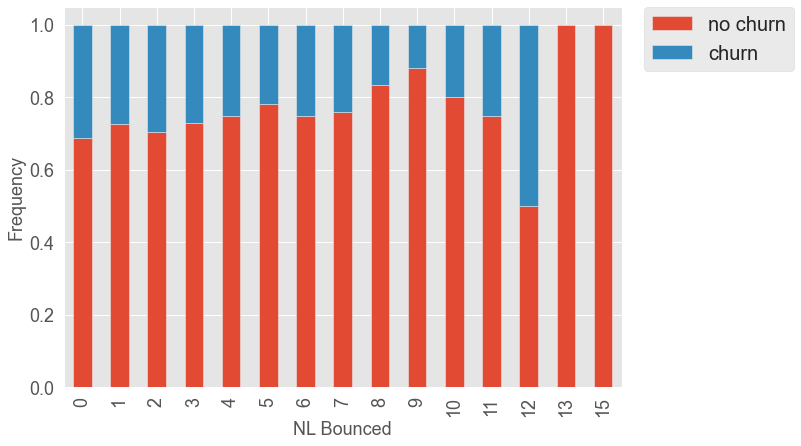

In [82]:
bounced_churn = crosstab_evaluation(df.nl_bounced_sum,df.churn)
crosstab_barplot(bounced_churn,['no churn','churn'],xlabelname='NL Bounced')

__Absolute NL Aktivitaet and Sperrliste__

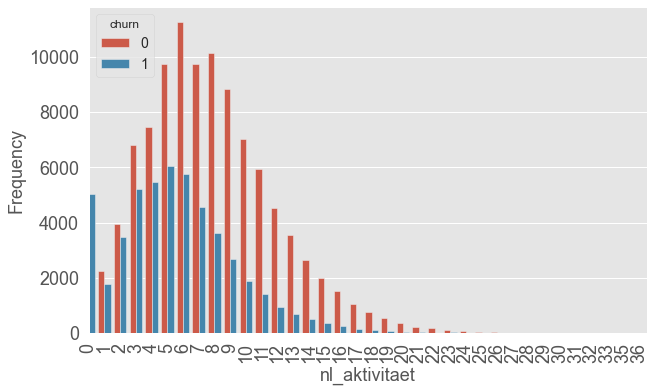

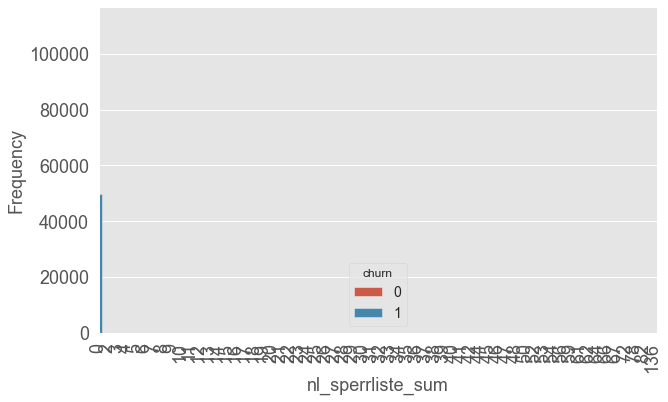

In [83]:
for i in ['nl_aktivitaet', 'nl_sperrliste_sum']:
    
    
    plt.subplots(figsize=(10,6))
    ax = sns.countplot(x=i, hue='churn', data=df)
    ax.set(xlabel=i, ylabel='Frequency', xlim=[0,None])

    ax.set_xticklabels(ax.get_xticklabels(), rotation=90) 

__Relative NL Aktivität__

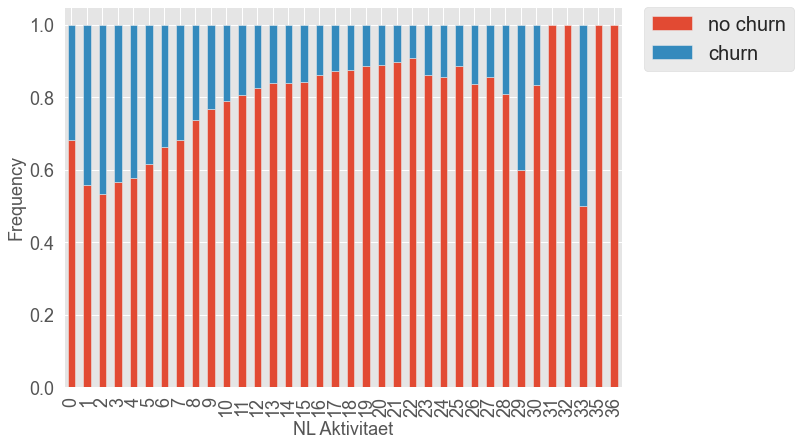

In [84]:
activitaet_churn = crosstab_evaluation(df.nl_aktivitaet,df.churn)
crosstab_barplot(activitaet_churn,['no churn','churn'],xlabelname='NL Aktivitaet')

__Relative NL Sperrliste__

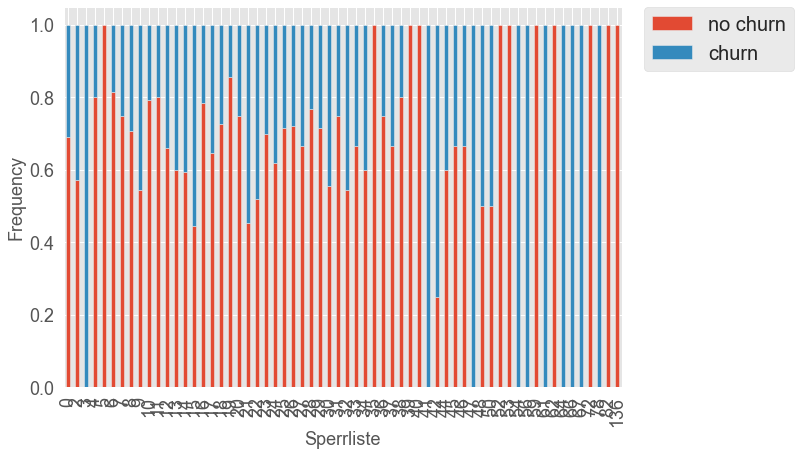

In [85]:
sperr_churn = crosstab_evaluation(df.nl_sperrliste_sum,df.churn)
crosstab_barplot(sperr_churn,['no churn','churn'],xlabelname='Sperrliste')

### Bestandskunden
* with received, opened, clicked, unsubscribed mails
* Time period = 6m 

__Bestandskunden__

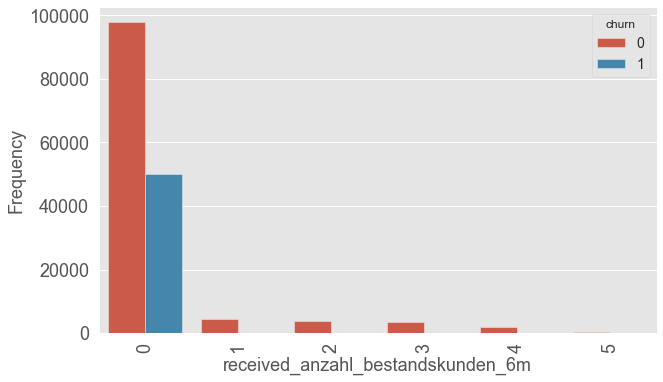

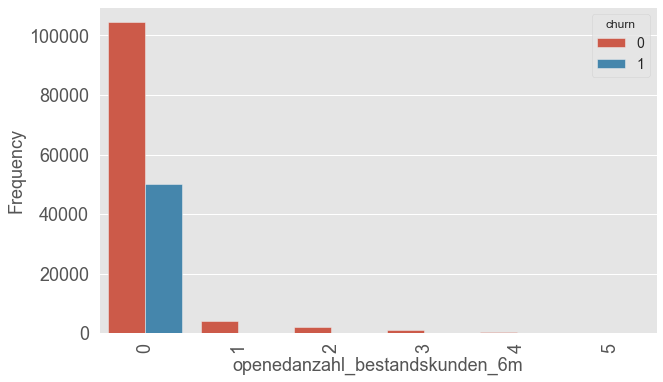

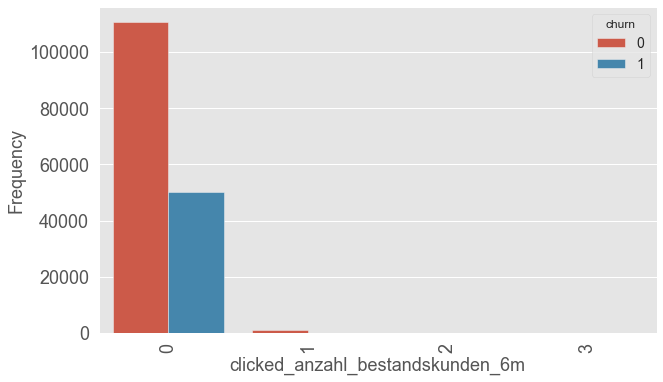

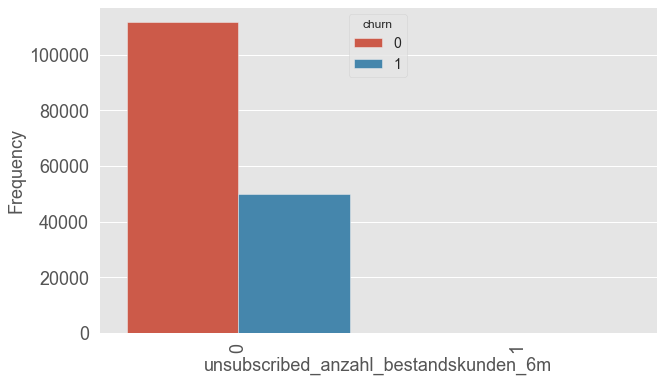

In [105]:
for i in ['received_anzahl_bestandskunden_6m', 'openedanzahl_bestandskunden_6m', 'clicked_anzahl_bestandskunden_6m', 'unsubscribed_anzahl_bestandskunden_6m']:
    
    
    plt.subplots(figsize=(10,6))
    ax = sns.countplot(x=i, hue='churn', data=df)
    ax.set(xlabel=i, ylabel='Frequency')

    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

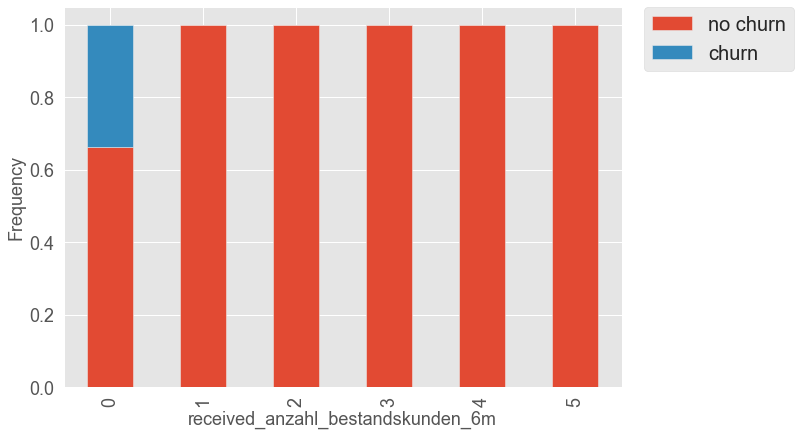

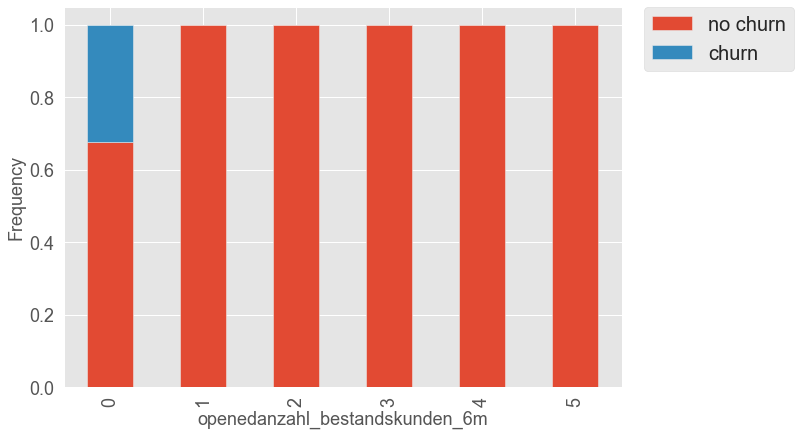

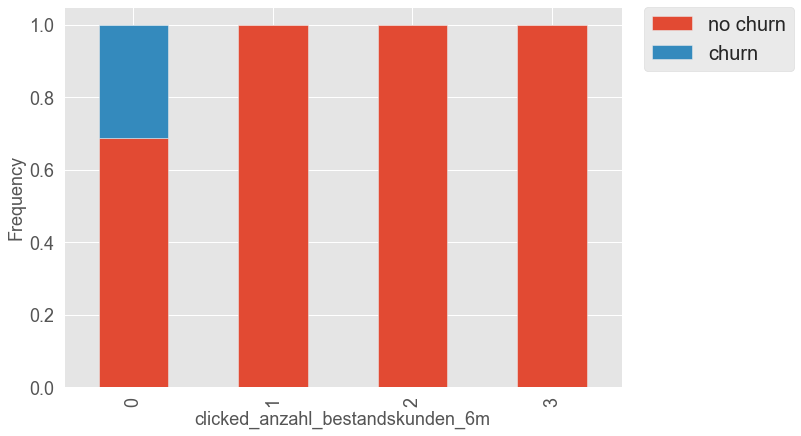

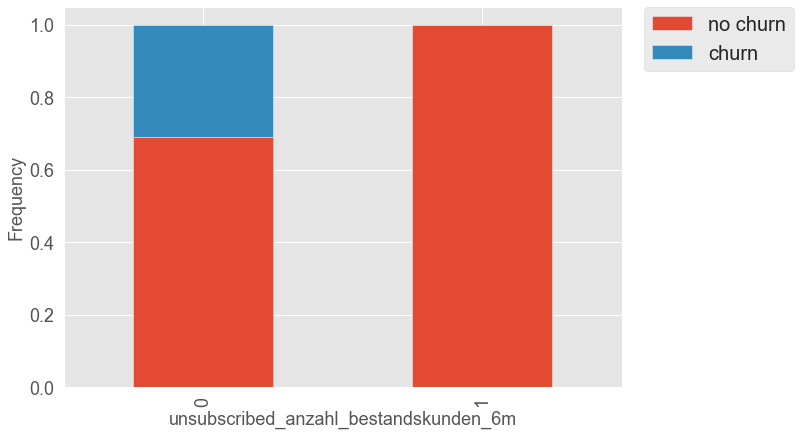

In [87]:
for i in ['received_anzahl_bestandskunden_6m', 'openedanzahl_bestandskunden_6m', 'clicked_anzahl_bestandskunden_6m', 'unsubscribed_anzahl_bestandskunden_6m']:
    
    x = crosstab_evaluation(df[i],df.churn)
    crosstab_barplot(x,['no churn','churn'],xlabelname=i)
   

### Produktnews
* with received, opened, clicked, unsubscribed mails
* Time period = 6m 

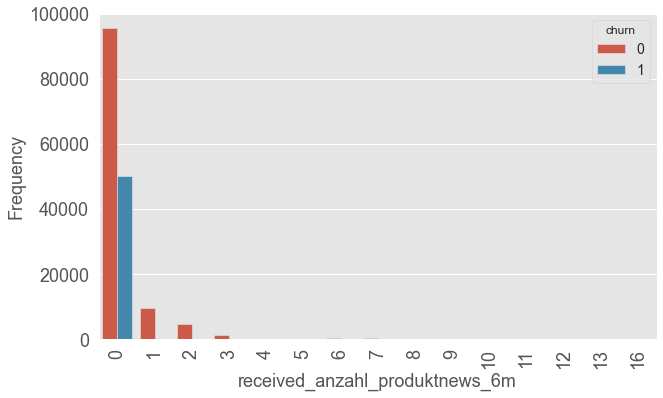

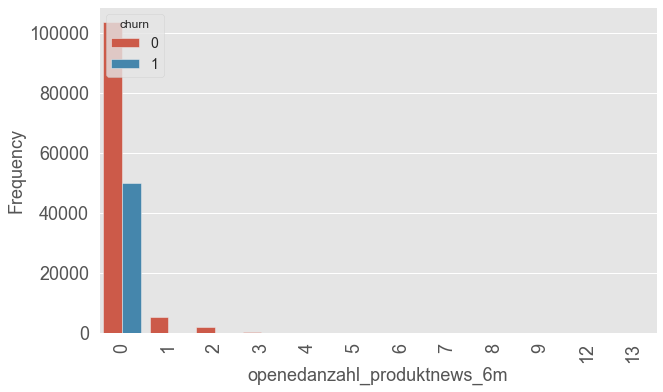

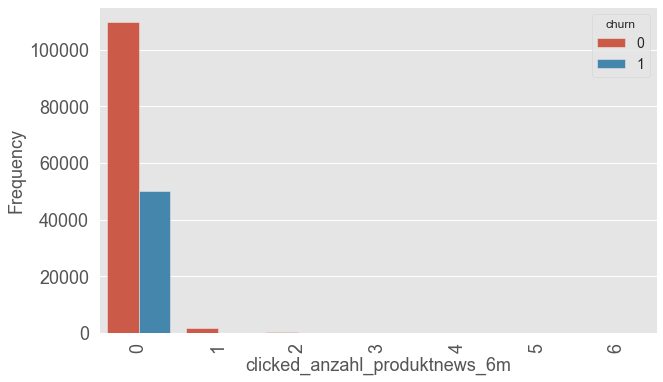

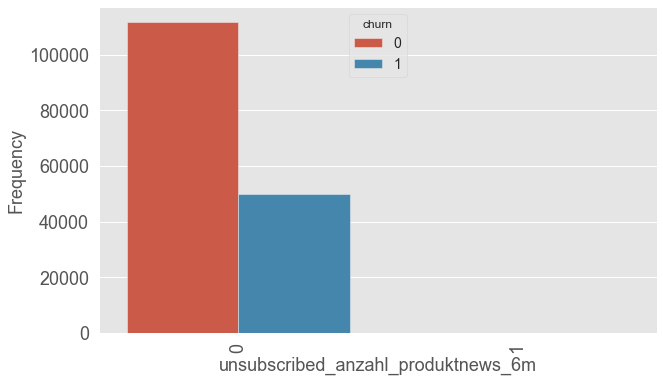

In [104]:
for i in ['received_anzahl_produktnews_6m', 'openedanzahl_produktnews_6m', 'clicked_anzahl_produktnews_6m', 'unsubscribed_anzahl_produktnews_6m']:
    
    
    plt.subplots(figsize=(10,6))
    ax = sns.countplot(x=i, hue='churn', data=df)
    ax.set(xlabel=i, ylabel='Frequency')

    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

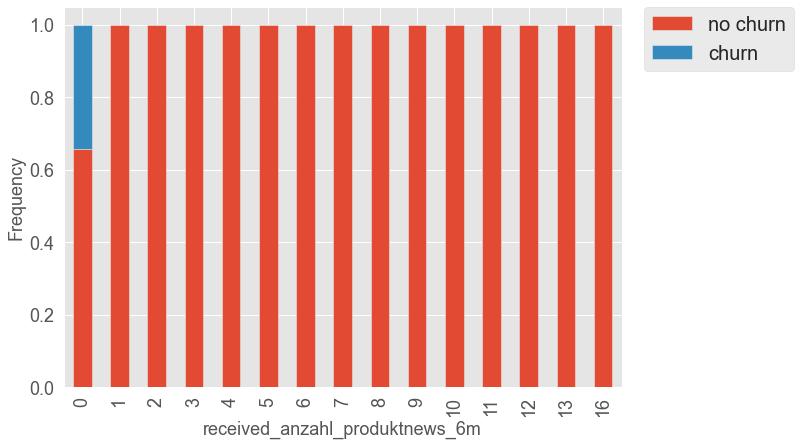

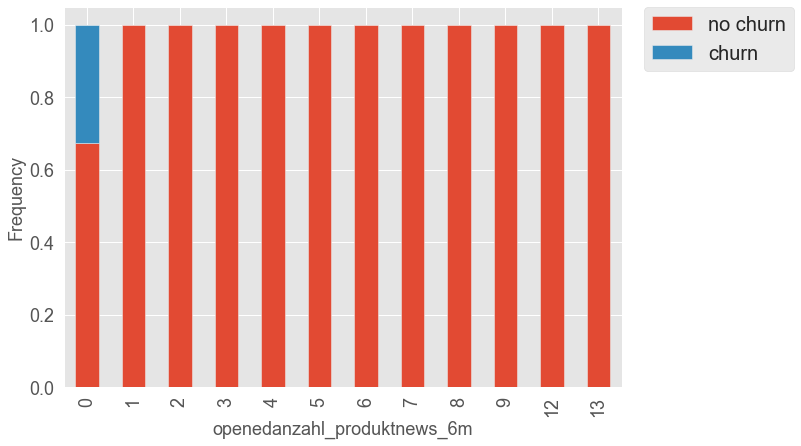

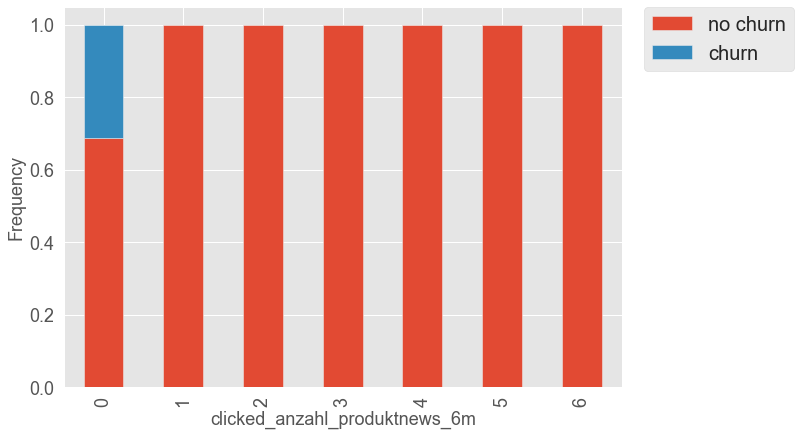

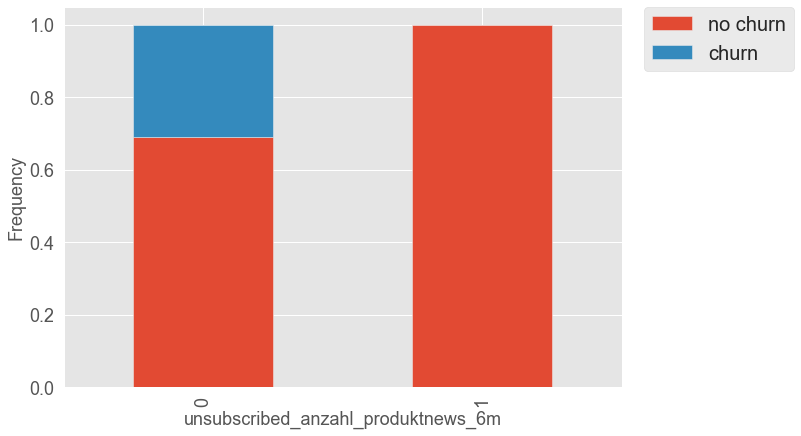

In [89]:
for i in ['received_anzahl_produktnews_6m', 'openedanzahl_produktnews_6m', 'clicked_anzahl_produktnews_6m', 'unsubscribed_anzahl_produktnews_6m']:
    x = crosstab_evaluation(df[i],df.churn)
    crosstab_barplot(x,['no churn','churn'],xlabelname=i)

### Hamburg
Daily Newsletter (Mo-Fr)
* with received, opened, clicked, unsubscribed mails
* Time period = 6m 

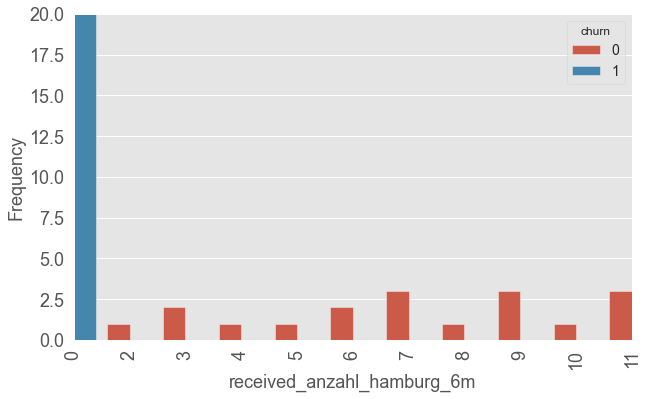

In [103]:
plt.subplots(figsize=(10,6))
ax = sns.countplot(x='received_anzahl_hamburg_6m', hue='churn', data=df)
ax.set(xlabel='received_anzahl_hamburg_6m', ylabel='Frequency')
ax.set(ylim=(0, 20))
ax.set(xlim=(0, 10))

ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

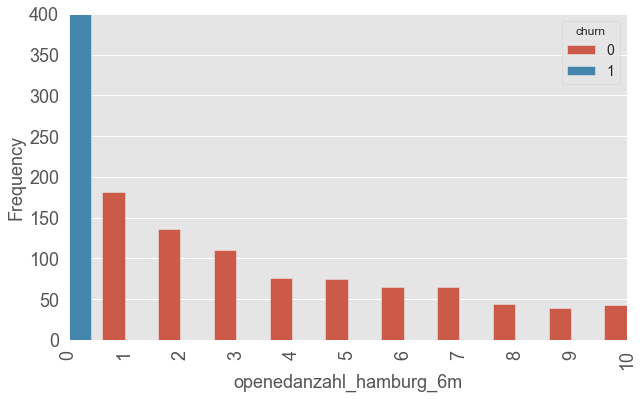

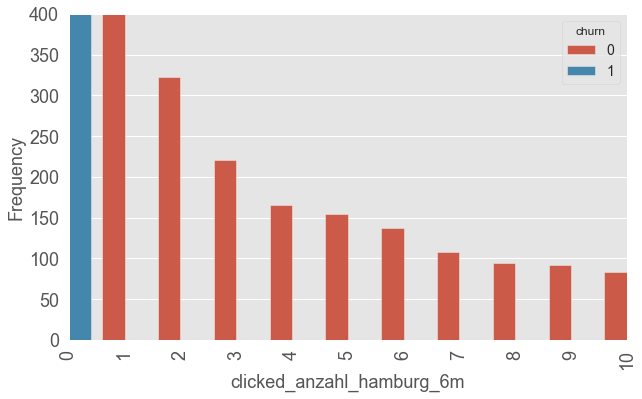

In [102]:
for i in ['openedanzahl_hamburg_6m', 'clicked_anzahl_hamburg_6m']:
    
    
    plt.subplots(figsize=(10,6))
    ax = sns.countplot(x=i, hue='churn', data=df)
    ax.set(xlabel=i, ylabel='Frequency')
    ax.set(ylim=(0, 400))
    ax.set(xlim=(0, 10))

    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

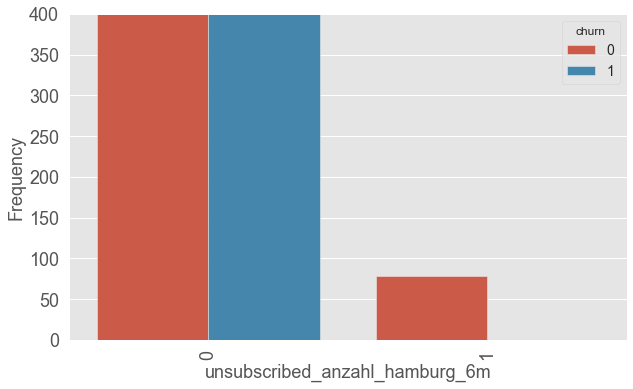

In [101]:
plt.subplots(figsize=(10,6))
ax = sns.countplot(x='unsubscribed_anzahl_hamburg_6m', hue='churn', data=df)
ax.set(xlabel='unsubscribed_anzahl_hamburg_6m', ylabel='Frequency')
ax.set(ylim=(0, 400))


ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

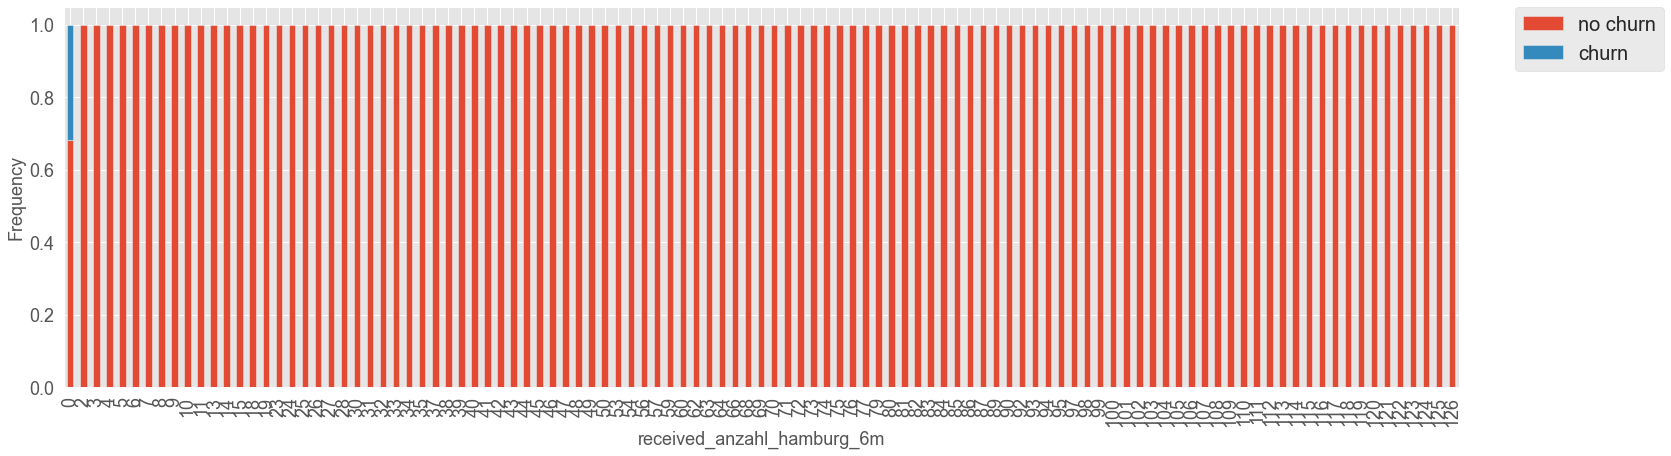

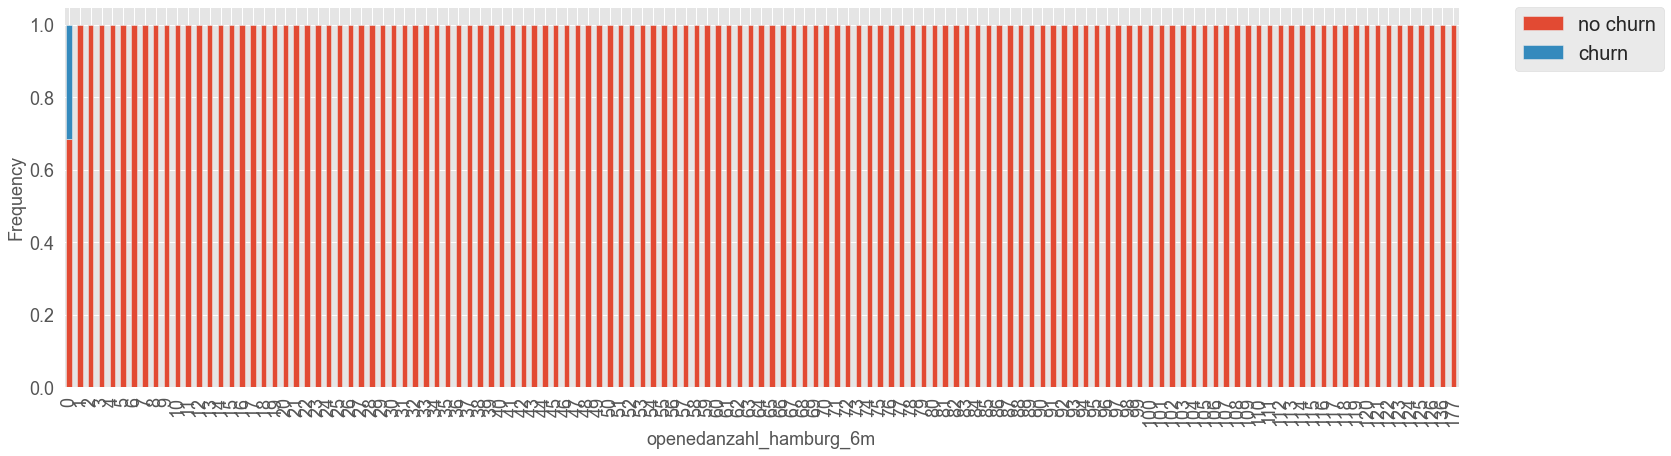

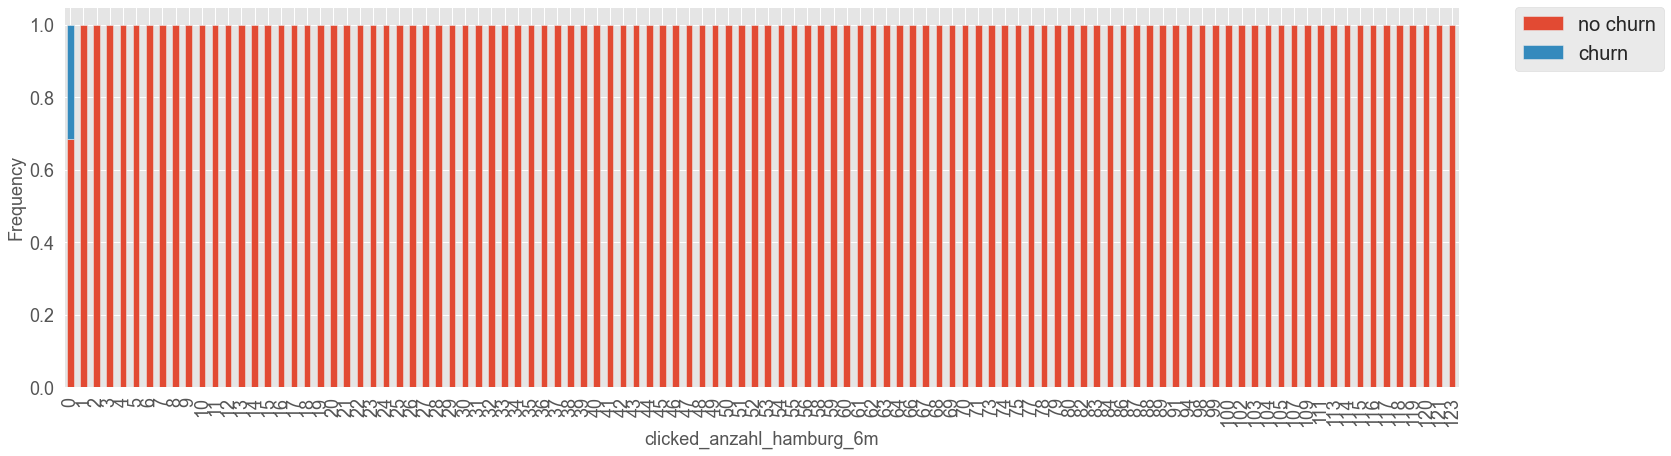

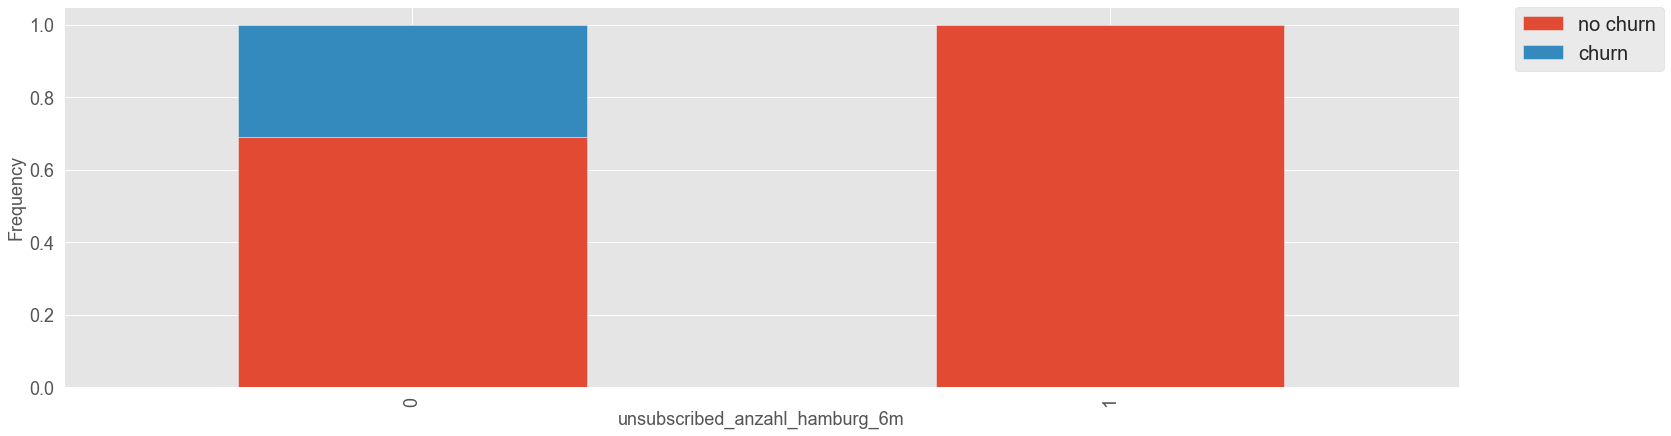

In [93]:
for i in ['received_anzahl_hamburg_6m', 'openedanzahl_hamburg_6m', 'clicked_anzahl_hamburg_6m', 'unsubscribed_anzahl_hamburg_6m']:
    x = crosstab_evaluation(df[i],df.churn)
    crosstab_barplot(x,['no churn','churn'],xlabelname=i, figsize_x=25)

### Zeitbrief
* with received, opened, clicked, unsubscribed mails
* Time period = 6m  

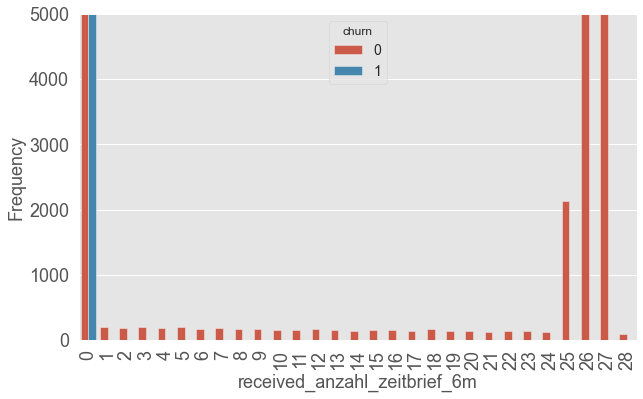

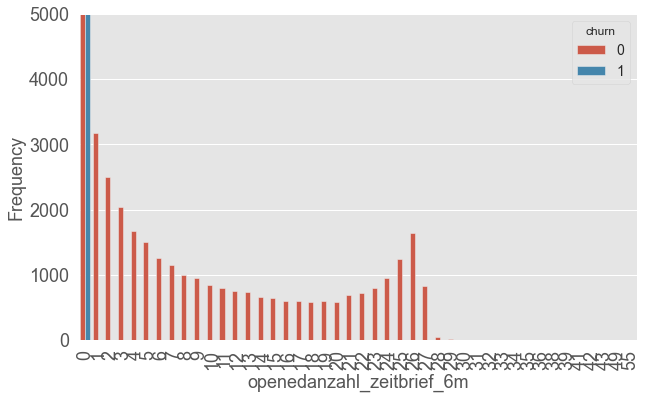

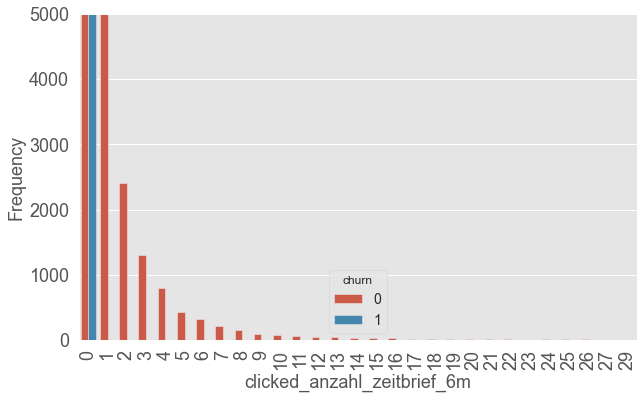

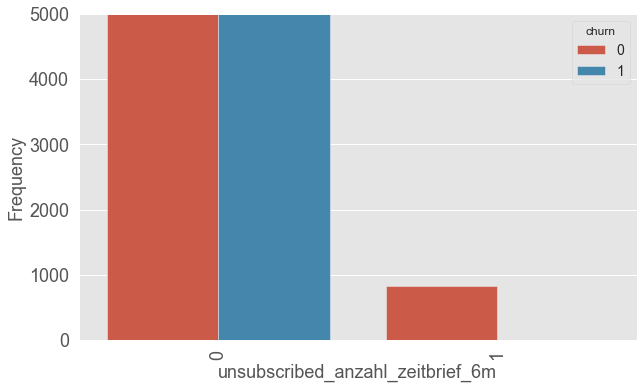

In [100]:
for i in ['received_anzahl_zeitbrief_6m', 'openedanzahl_zeitbrief_6m', 'clicked_anzahl_zeitbrief_6m', 'unsubscribed_anzahl_zeitbrief_6m']:
    
    
    plt.subplots(figsize=(10,6))
    ax = sns.countplot(x=i, hue='churn', data=df)
    ax.set(xlabel=i, ylabel='Frequency')
    ax.set(ylim=(0, 5000))

    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

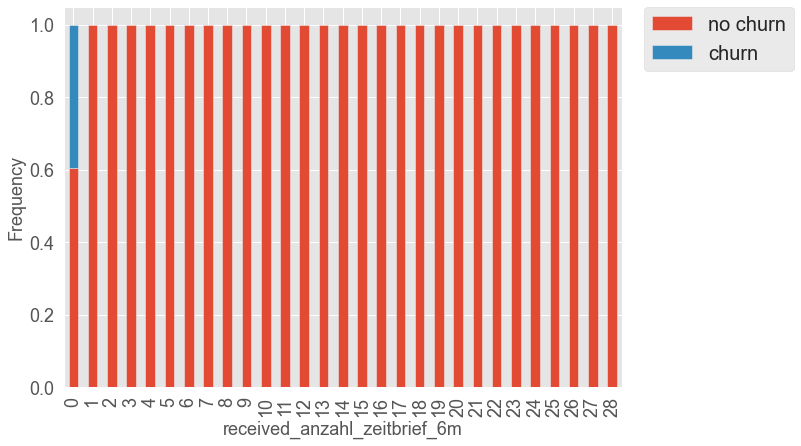

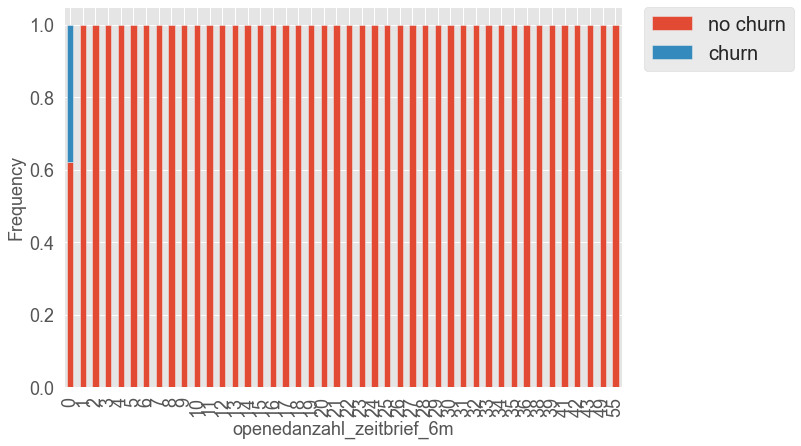

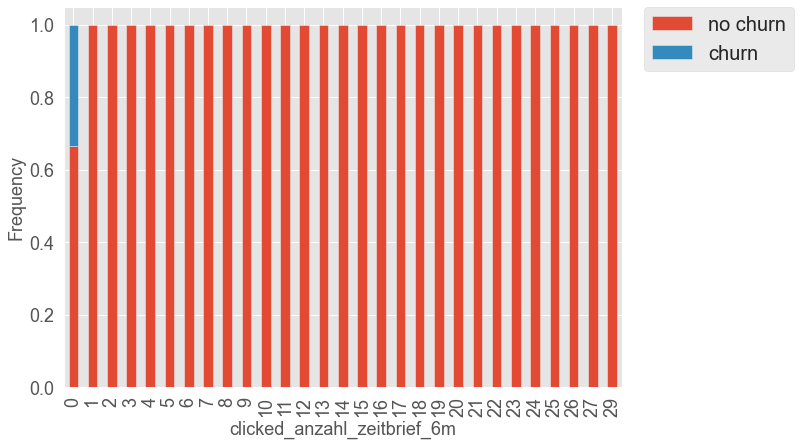

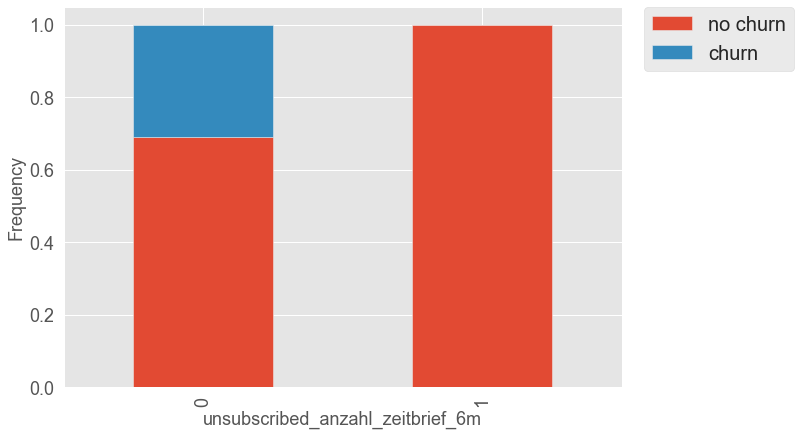

In [95]:
for i in ['received_anzahl_zeitbrief_6m', 'openedanzahl_zeitbrief_6m', 'clicked_anzahl_zeitbrief_6m', 'unsubscribed_anzahl_zeitbrief_6m']:
    x = crosstab_evaluation(df[i],df.churn)
    crosstab_barplot(x,['no churn','churn'],xlabelname=i)

### Open and Clickrate
--> Bins?
* for bestandskunden, productnews, hamburg, zeitbrief
* Time period = 3m 

__Clickrate__

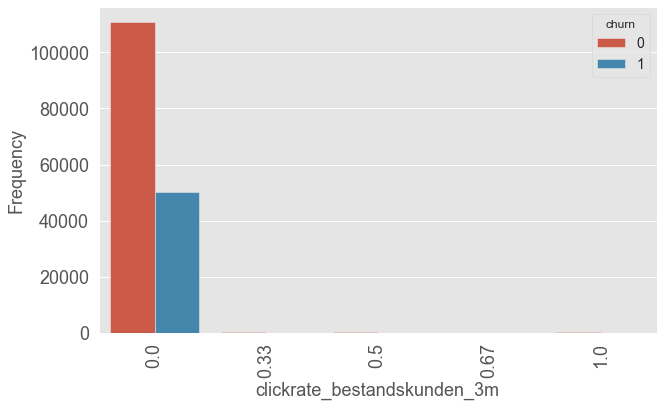

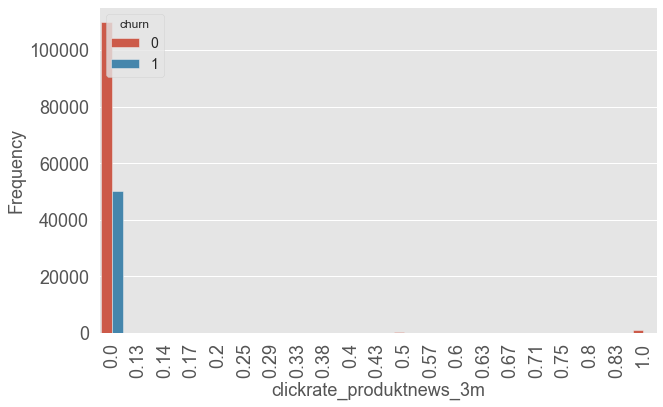

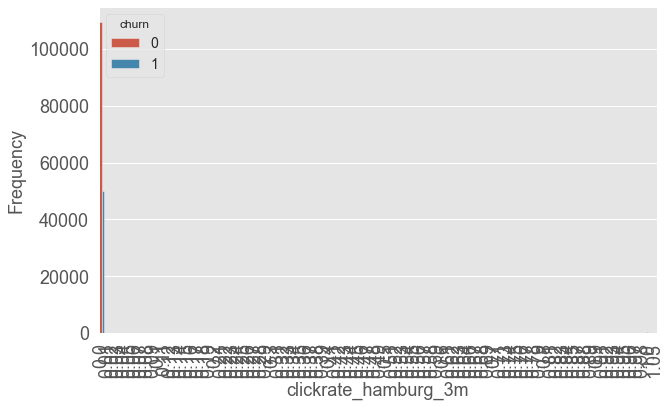

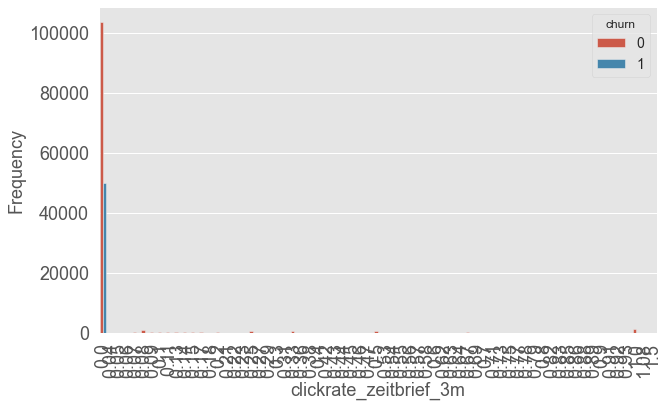

In [99]:
for i in ['clickrate_bestandskunden_3m', 'clickrate_produktnews_3m', 'clickrate_hamburg_3m', 'clickrate_zeitbrief_3m']:
    

    plt.subplots(figsize=(10,6))
    ax = sns.countplot(x=i, hue='churn', data=df)
    ax.set(xlabel=i, ylabel='Frequency')

    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

__Openrate__

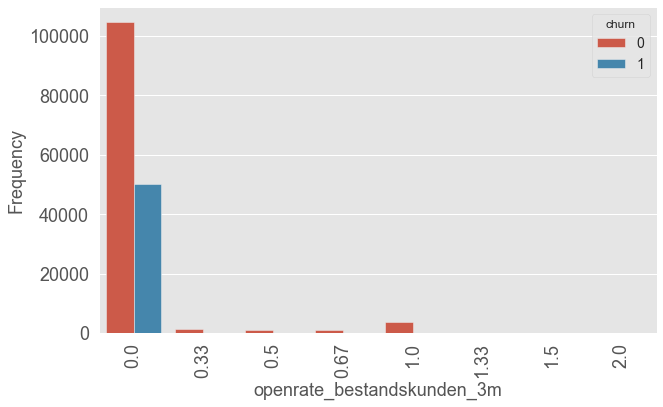

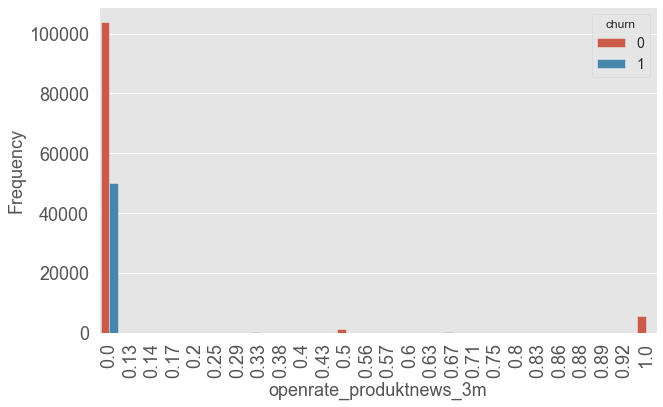

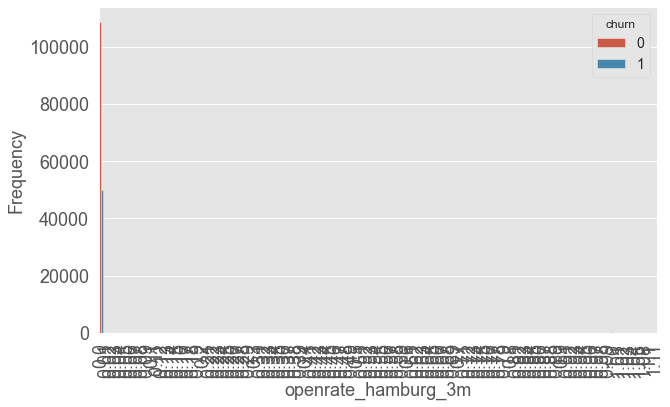

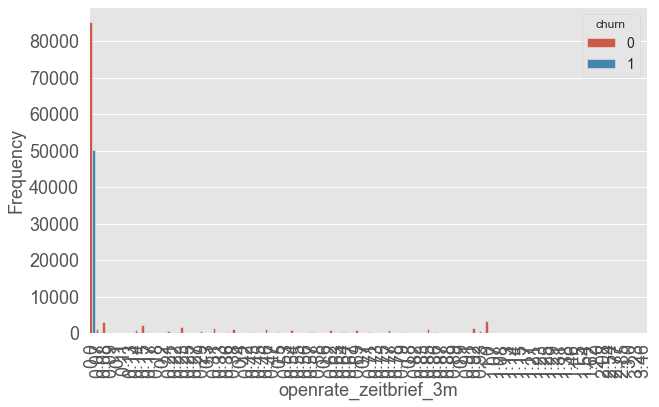

In [98]:
for i in ['openrate_bestandskunden_3m', 'openrate_produktnews_3m', 'openrate_hamburg_3m', 'openrate_zeitbrief_3m']:
    

    plt.subplots(figsize=(10,6))
    ax = sns.countplot(x=i, hue='churn', data=df)
    ax.set(xlabel=i, ylabel='Frequency')
    #ax.set(ylim=(0, 5000))

    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

### Summary Activity Features
It seems that only subscribers who have not subscribed to any of the four newsletters (Bestandskunden, Produktnews, Hamburg and Zeitbrief) churned.

## Target Variable Analysis

Our target variable is "churn", which is 1 - churn or 0 - no churn. 

## Feature Analysis

## Observation of histograms for distribution characteristics

## Correlogram for continuous variables - Heatmap

## Overal Skew and Kurtosis of the data

## Final Feature Selection List and Dropping of Features

## Statistical distribution of our target default

## Export the dataframe to .csv file

## Conclusion

# Feature Engineering

# Predictive Modelling

## Structure of the notebooks for machine learning

We used different jupyter notebook for different methods of machine learning. These notebooks are linked here:
    
- ...

- ...

- ...

- ...

# Data Visualization

The results and our main finding can be found in our presentation:

# Future Work

The aspects of future work can be found in our presentation. 